In [3]:
import os
# import nglview as nv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# import seaborn as sns
# from hilbertcurve.hilbertcurve import HilbertCurve
from scipy.ndimage import gaussian_filter
from scipy.stats import entropy

#####################################3
import re
import xml.etree.ElementTree as ET
import datetime
from xml.dom import minidom


    
def lig_xml(dic, write_file=False, source=False):
  root = ET.Element('ForceField')
  info = ET.SubElement(root, 'Info')
  info_date = ET.SubElement(info, "date")
  info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S')
  if source != False: 
    info_file = ET.SubElement(info, 'source')
    info_file.text = source

  data_lig = ET.SubElement(root, 'LIG')
  for i in range(len(dic["name"])):
    tmpattrib={
      "name":dic["name"][i], 
      "type": dic["type"][i], 
      "charge": str(dic["charge"][i]), 
      'penalty': str(dic["penalty"][i]),
    }
    tmpatom = ET.SubElement(data_lig, 'ATOM', attrib = tmpattrib)

  ligxml_str = ET.tostring(root , encoding="unicode")
  dom = minidom.parseString(ligxml_str)
  ligxml_str = dom.toprettyxml()

  if write_file != False :
    with open(write_file, "w") as file1: 
      file1.write(ligxml_str)
  return ligxml_str

def cgenff2dic(filename):
  with open(filename) as file1:
    lst = list(filter(lambda i: re.match(r"^ATOM.*!", i), file1))
  theatom  = [i.strip("\n").split()[1] for i in lst]
  atomtype = [i.strip("\n").split()[2] for i in lst]
  charge   = [float(i.strip("\n").split()[3]) for i in lst]
  penalty  = [float(i.strip("\n").split()[-1]) for i in lst]
  return {"name":theatom, "type":atomtype, "charge":charge, "penalty":penalty}

def cgenff2xmls(cgenffname):
  cgenffdic = cgenff2dic(cgenffname); 
  print(cgenffdic)
  root = ET.Element('ForceField')
  info = ET.SubElement(root, 'Info')
  info_date = ET.SubElement(info, "date")
  info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S');
  data_lig = ET.SubElement(root, 'LIG')
  for i in range(len(cgenffdic["name"])):
    tmpattrib={
      "name":cgenffdic["name"][i], 
      "type": cgenffdic["type"][i], 
      "charge": str(cgenffdic["charge"][i]), 
      'penalty': str(cgenffdic["penalty"][i]),
    }
    tmpatom = ET.SubElement(data_lig, 'ATOM', attrib = tmpattrib)
  ligxml_str = ET.tostring(root , encoding="unicode")
  ligxml_str = minidom.parseString(ligxml_str).toprettyxml(indent="  ")
  return ligxml_str

def cgenff2xml(cgenffname, outfile):
  xmlstr = cgenff2xmls(cgenffname); 
  with open(outfile, "w") as file1: 
    file1.write(xmlstr)
  return 
  
a="/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/MDL.str"
b="/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/MDL.xml"
cgenff2xml(a, b)


{'name': ['C1', 'C2', 'H3', 'C4', 'C5', 'C6', 'C7', 'N8', 'C9', 'C10', 'N11', 'C12', 'O13', 'C14', 'C15', 'N16', 'C17', 'O18', 'N19', 'C20', 'O21', 'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H28', 'H29', 'H30', 'H31', 'H32', 'H33', 'H34'], 'type': ['CG331', 'CG311', 'HGA1', 'CG321', 'CG2R61', 'CG2R61', 'CG2R61', 'NG2R60', 'CG2R61', 'CG2R61', 'NG2S1', 'CG2O1', 'OG2D1', 'CG2R62', 'CG2R62', 'NG2R61', 'CG2R63', 'OG2D4', 'NG2R61', 'CG2R63', 'OG2D4', 'HGA3', 'HGA3', 'HGA3', 'HGA2', 'HGA2', 'HGR61', 'HGR62', 'HGR62', 'HGR61', 'HGP1', 'HGR62', 'HGP1', 'HGP1'], 'charge': [-0.268, -0.131, 0.09, -0.089, -0.004, -0.124, 0.19, -0.598, 0.19, -0.124, -0.262, 0.267, -0.375, -0.035, 0.001, -0.614, 0.321, -0.433, -0.264, 0.634, -0.435, 0.09, 0.09, 0.09, 0.09, 0.09, 0.115, 0.122, 0.122, 0.115, 0.313, 0.138, 0.331, 0.357], 'penalty': [2.449, 2.67, 0.0, 2.941, 2.182, 0.0, 0.0, 0.0, 0.0, 0.0, 1.644, 28.001, 0.075, 33.354, 1.225, 0.0, 0.0, 0.0, 3.984, 34.197, 24.168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [4]:
import re
import xml.etree.ElementTree as ET
import datetime
from xml.dom import minidom

def rtp2xml(rtpfile): 
  with open(rtpfile, "r") as file1:
    residues = [];
    newres="";
    inres = 0
    for i in file1:
      i = re.sub(";.*", "", i)
      if len(i) < 4:
        continue
      if ("[" in i) and (not re.search(r"bondedtypes|cmap|impropers|bonds|atoms", i)):
        inres = 1
        if len(newres) > 0:
          residues.append(newres);
          newres=''
      if inres ==1: 
        newres += i;
    residues.append(newres);
  dic = {}
  for i in residues:
    restitle = i.split("\n")[0].split()[1];
    dic[restitle] = {"name":[], "type": [], "charge":[]}
    inatom = 0; 
    for line in i.strip("\n").split("\n"): 
      if re.search(r"\[.*atoms.*\]", line):
        inatom = 1; 
        continue
      elif re.search(r"\[.*\]", line):
        inatom = 0;  
        continue
      if inatom == 1:
        thisline = line.strip().split(); 
        dic[restitle]["name"].append(thisline[0])
        dic[restitle]["type"].append(thisline[1])
        dic[restitle]["charge"].append(float(thisline[2]))
  root = ET.Element('ForceField')
  info = ET.SubElement(root, 'Info')
  info_date = ET.SubElement(info, "date")
  info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S');
  for res in dic.keys():
    if re.search(r"^[0-9]", res) or len(res) >= 5:
      # Tagnames start with a number is illegal tagnames
      # print(f"Skipping {res}")
      continue
    data_lig = ET.SubElement(root, res); 
    for i in range(len(dic[res]["name"])):
      tmpattrib={
        "name":dic[res]["name"][i], 
        "type": dic[res]["type"][i], 
        "charge": str(dic[res]["charge"][i]), 
      }
      tmpatom = ET.SubElement(data_lig, 'ATOM', attrib = tmpattrib)
  finalstr = ET.tostring(root , encoding="unicode")
  finalstr = minidom.parseString(finalstr).toprettyxml(indent="  ")
  with open("/tmp/test1.xml", "w") as file1: 
    file1.write(finalstr)
  
a = "/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/charmm36-feb2021.ff/merged.rtp"
rtp2xml(a)

In [73]:

class ChargeParser:
  def __init__(self, topology):
    # self.domff = minidom.parse(ff)
    # self.residues = self.domff.getElementsByTagName("Residue")
    self.residuemap = {
      "TIP3":"T3P",
      "HOH":"T3P",
      "WAT":"T3P",
      'HID':"HSD",
      'HIE':"HSE",
      'HIP':"HSP", 
      "CYX":"CYS",
    }
    self.atommap = {
      "H": "HN",
      "O1":"OT1",
      "O2":"OT2",
      "HD11":"HD1",
      "HD12":"HD2",
      "HD13":"HD3",
    }
    # self.map_resnames()
    self.top = topology; 
    self.residuelist = [i.name for i in self.top.residues] + ["NME", "ACE", "FOR", "NH2"]; 
    self.residueset = [i for i in set(self.residuelist)]; 
    
    self.chargedic = {}; 
    self.chargemap = ET.Element('ForceField'); 
    info = ET.SubElement(self.chargemap, 'Info'); 
    info_date = ET.SubElement(info, "date"); 
    info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S');
    
    
  def chargefrompatch(self, resname, patchdic):
    assert "name" in patchdic.keys(), "<name> should be in the patch dictionary"
    assert "charge" in patchdic.keys(), "<charge> should be in the patch dictionary"
    data_lig = ET.SubElement(self.chargemap, "Residue", attrib = {"name":resname}); 
    for i in range(len(patchdic["name"])):
      tmpattrib={
        "name": patchdic["name"][i], 
        "type": patchdic["type"][i], 
        "charge": str(patchdic["charge"][i]), 
      }
      tmpatom = ET.SubElement(data_lig, 'Atom', attrib = tmpattrib)
  
  def chargefromcgenff(self, resname, cgenfffile): 
    """
      TODO: Where is the cgenff2dic function
    """
    dic = cgenff2dic(cgenfffile)
    self.chargefrompatch(resname, dic)
    
  def chargefromrtp(self, rtpfile): 
    with open(rtpfile, "r") as file1:
      residues = [];
      newres="";
      inres = 0
      for i in file1:
        i = re.sub(";.*", "", i)
        if len(i) < 4:
          continue
        if ("[" in i) and (not re.search(r"bondedtypes|cmap|impropers|bonds|atoms", i)):
          inres = 1
          if len(newres) > 0:
            residues.append(newres);
            newres=''
        if inres ==1: 
          newres += i;
      residues.append(newres);
    dic = {}
    for i in residues:
      restitle = i.split("\n")[0].split()[1];
      if restitle not in self.residueset:
        continue
      dic[restitle] = {"name":[], "type": [], "charge":[]}
      inatom = 0; 
      for line in i.strip("\n").split("\n"): 
        if re.search(r"\[.*atoms.*\]", line):
          inatom = 1; 
          continue
        elif re.search(r"\[.*\]", line):
          inatom = 0;  
          continue
        if inatom == 1:
          thisline = line.strip().split(); 
          dic[restitle]["name"].append(thisline[0])
          dic[restitle]["type"].append(thisline[1])
          dic[restitle]["charge"].append(float(thisline[2]))
    for key, val in dic.items():
      self.chargefrompatch(key, val)
  
  def chargefromxml(self, xmlfile): 
    xmlff = minidom.parse(xmlfile);
    residues = xmlff.getElementsByTagName("Residues")
    residues = residues[0].getElementsByTagName("Residue")
    for i in residues:
      thedic = {"name":[], "type": [], "charge":[]}
      resname = i.attributes["name"].value
      if resname not in self.residueset:
        continue
      thedic["name"] = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]
      thedic["type"] = [_.attributes["type"].value for _ in i.getElementsByTagName("Atom")]
      thedic["charge"] = [_.attributes["charge"].value for _ in i.getElementsByTagName("Atom")]
      self.chargefrompatch(resname, thedic)

  def chargefrommol2(self): 
    pass
  
  def check_topology(self):
    self.chargedic = self.todic(); 
    atomtypelst = []; 
    for i in self.top.atoms:
      atomname = i.name
      atmid = f"{self.residuelist[i.resid]}_{atomname}"
      if atmid not in atomtypelst:
        atomtypelst.append(atmid); 
        if self.residuelist[i.resid] in self.chargedic.keys(): 
          names = self.chargedic[self.residuelist[i.resid]]["name"]
          if atomname not in names:
            if atomname in self.atommap.keys():
              if self.atommap[atomname] not in names:
                print(f"Not found the atom {self.residuelist[i.resid]}_{atomname}; "); 
            else: 
              print(f"Not found the atom {self.residuelist[i.resid]}_{atomname}; "); 
        
            
  def todic(self):
    chargedic = {}
    ff = BeautifulSoup(self.xml, 'xml'); 
    for resname in self.residueset:
      residue = ff.find("Residue", {"name":resname})
      if residue and len(residue) > 0:
        chargedic[resname] = {}
        atoms = residue.find_all("Atom")
        chargedic[resname]["name"] = [i['name'] for i in atoms]
        chargedic[resname]["charge"] = [float(i['charge']) for i in atoms]
      else: 
        print(f"Not found the residue: {resname}")
    return chargedic
  
  def printxml(self):
    finalstr = ET.tostring(self.chargemap , encoding="unicode")
    finalstr = minidom.parseString(finalstr).toprettyxml(indent="  ")
    print(finalstr)
    
  @property
  def xml(self):
    finalstr = ET.tostring(self.chargemap , encoding="unicode"); 
    finalstr = minidom.parseString(finalstr).toprettyxml(indent="  "); 
    return finalstr; 

    
  def map_resnames(self):
    reslst = [i.getAttribute("name") for i in self.residues]
    for i in reslst: 
      if i in self.residuemap.keys():
        print(f"mapping residue {i}")
        idx = reslst.index(i)
        self.residues[idx].setAttribute("name", self.residuemap[i])
    self.residues = self.domff.getElementsByTagName("Residue")
    
  def map_atomname(self):
    pass

  def format_resname(self, resname):
    resname = resname.upper()
    if resname in self.residuemap.keys():
      resname = self.residuemap[resname]
    return resname

  def format_atomname(self, retdic):
    keys = retdic.keys()
    values = retdic.values()
    return {i:j for i,j in zip(keys, values)}

  def getTypes(self, resname):
    # TODO: possible changes to map the residue name 
    # TODO: map HIS/HIE/HID, CYX, etc
    resname = self.format_resname(resname);
    for i in self.residues: # self.domff.getElementsByTagName("Residue"):
      if i.attributes["name"].value == resname:
        names = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]
        types = [_.attributes["type"].value for _ in i.getElementsByTagName("Atom")]
        break
    ret = {i:j for i,j in zip(names, types)}
    return self.format_atomname(ret)

  def getCharges(self, resname):
    # TODO: possible changes to map the residue name 
    # TODO: map HIS/HIE/HID, CYX, etc
    resname = self.format_resname(resname); 
    for i in self.residues: 
      if i.attributes["name"].value == resname:
        names = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]
        charges = [_.attributes["charge"].value for _ in i.getElementsByTagName("Atom")]
        break
    ret = {i:float(j) for i,j in zip(names, charges)}
    return self.format_atomname(ret)

  def getAtomCharge(self, resname, atomname):
    resname = self.format_resname(resname); 
    found_res = False
    for i in self.residues: 
      if i.attributes["name"].value == resname:
        names = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]; 
        charges = [_.attributes["charge"].value for _ in i.getElementsByTagName("Atom")]; 
        found_res = True;
        break
    if found_res: 
      found_atom = False;
      for i,j in zip(names, charges):
        if i == atomname: 
          return float(j); 
          found_atom = True; 
          break
      if not found_atom:
        print(f"Found the residue {resname}, however, Not found the atom {atomname}"); 
        return 0; 
    else : 
      print(f"Not found the residue {resname}")
      return 0; 

  def addFF(self, ff, waitlist=[]):
    # use minidom purely
    residues_oldff = self.domff.getElementsByTagName('Residues')
    newff = minidom.parse(ff)
    residues_newff = newff.getElementsByTagName('Residue')
    for i in residues_newff:
      if len(waitlist) == 0 or i.getAttribute("name") in waitlist:
        residues_oldff[0].appendChild(i)
      else: 
        pass
    self.residues = self.domff.getElementsByTagName("Residue")
    self.map_resnames()

import pytraj as pt
from bs4 import BeautifulSoup

cgenfffile="/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/MDL.str"
patch = {'name': ['C1', 'C2', 'H3', 'C4', 'C5', 'C6', 'C7', 'N8', 'C9', 'C10', 'N11', 'C12', 'O13', 'C14', 'C15', 'N16', 'C17', 'O18', 'N19', 'C20', 'O21', 'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H28', 'H29', 'H30', 'H31', 'H32', 'H33', 'H34'], 'type': ['CG331', 'CG311', 'HGA1', 'CG321', 'CG2R61', 'CG2R61', 'CG2R61', 'NG2R60', 'CG2R61', 'CG2R61', 'NG2S1', 'CG2O1', 'OG2D1', 'CG2R62', 'CG2R62', 'NG2R61', 'CG2R63', 'OG2D4', 'NG2R61', 'CG2R63', 'OG2D4', 'HGA3', 'HGA3', 'HGA3', 'HGA2', 'HGA2', 'HGR61', 'HGR62', 'HGR62', 'HGR61', 'HGP1', 'HGR62', 'HGP1', 'HGP1'], 'charge': [-0.268, -0.131, 0.09, -0.089, -0.004, -0.124, 0.19, -0.598, 0.19, -0.124, -0.262, 0.267, -0.375, -0.035, 0.001, -0.614, 0.321, -0.433, -0.264, 0.634, -0.435, 0.09, 0.09, 0.09, 0.09, 0.09, 0.115, 0.122, 0.122, 0.115, 0.313, 0.138, 0.331, 0.357], 'penalty': [2.449, 2.67, 0.0, 2.941, 2.182, 0.0, 0.0, 0.0, 0.0, 0.0, 1.644, 28.001, 0.075, 33.354, 1.225, 0.0, 0.0, 0.0, 3.984, 34.197, 24.168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.258, 1.188, 0.0, 0.0]}
rtp = "/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/charmm36-feb2021.ff/merged.rtp"
xmlfile="/home/yzhang/Documents/Personal_documents/BetaPose/Forcefield/charmm36_nowaters.xml"

traj = pt.load("/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/C022simtemp3_PDB.pdb")

chargeparser = ChargeParser(traj.top)
chargeparser.chargefromrtp(rtp)
chargeparser.chargefromxml(xmlfile)
chargeparser.chargefromcgenff("LIG", cgenfffile)
# chargeparser.chargefromcgenff("LIG", cgenfffile)
# chargeparser.printxml()
chargeparser.check_topology()



Not found the residue: T3P
Not found the residue: K+
Not found the residue: CL-
Not found the atom ASP_H1; 
Not found the atom ASP_H2; 
Not found the atom ASP_H3; 
Not found the atom GLN_O1; 
Not found the atom GLN_O2; 


In [5]:
import time
import pickle 
import numpy as np 
import pytraj as pt 
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix
from scipy.ndimage import gaussian_filter
from scipy.stats import entropy

from BetaPose import utils

# Forcefield and xml related functions
import re
from xml.dom import minidom
import xml.etree.ElementTree as ET

tmptop = pt.load("./tests/featurizer_test1.pdb")
def getprotein(traj):
  reslst = []
  for i in traj.top.atoms:
    if i.name=="CA":
      reslst.append(i.resid+1)
  mask = ":"+",".join([str(i) for i in reslst])
  return traj.top.select(mask)

  
a = utils.getprotein(tmptop)
# print((a+1).astype(str).tolist()+a.tolist())



In [27]:
a = "   [ bond]"
import re
if re.search(r"atom|bond", a):
  print("found")

found


In [127]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import nglview as nv 
import pytraj as pt
%matplotlib
# %nglview
class feature_3d_reader:
  def __init__(self, pickleFile):
    # Generate the 2D/3D hilbert curve
    with open(pickleFile, "rb") as file1:
      featuredic = pickle.load(file1)
      print(featuredic.keys()); 
      self.distances = featuredic["distances"]; 
      self.length3D  = featuredic["length3D"];
      self.points3D  = featuredic["points3D"]; 
      self.index3D   = featuredic["index3D"];
      self.features  = featuredic["features"];

      self.atom_groups = featuredic["atom_groups"]; 
      self.frameList = featuredic["frameList"]
      self.frameNr   = featuredic["frameNr"]
      if "element" in self.features:
        self.atom_mass  = featuredic["atom_mass"]
        self.norm_mass  = featuredic["norm_mass"]
        self.gauss_mass = featuredic["gauss_mass"]
      if "entropy" in self.features:
        self.entropy = featuredic["entropy"]
        self.gauss_entropy = featuredic["gauss_entropy"]
      if "charge" in self.features:
        self.atom_charge  = featuredic["atom_charge"]; 
        self.gauss_charge = featuredic["gauss_charge"]; 
        
  def selectData(self, maintype, select_group, subtype="gauss"):
    if maintype == "element":
      if subtype == "atom":
        data = self.atom_mass[select_group]; 
      elif subtype == "norm":
        data = self.norm_mass[select_group]; 
      elif subtype == "gauss": 
        data = self.gauss_mass[select_group]; 
      else: 
        print(f"Not Found the subtype {subtype}"); 
        data = self.gauss_mass[select_group]; 
    elif maintype == "entropy":
      if subtype == "gauss":
        data = self.gauss_entropy; 
      else:
        data = self.entropy; 
    elif maintype == "charge":
      if subtype == "atom":
        data = self.atom_charge[select_group]; 
      elif subtype == "gauss": 
        data = self.gauss_charge[select_group]; 
      else: 
        print(f"Not Found the subtype {subtype}"); 
        data = self.gauss_charge[select_group]; 
    return data
  
  def scatter3D(self, maintype, select_group, indice=0, subtype="gauss", cmap="Blues", threshold=0.1):
    thedata = self.selectData(maintype, select_group, subtype=subtype);
    if maintype == "element":
      thedata = thedata[indice]

    fig = plt.figure(); 
    ax = fig.add_subplot(projection='3d'); 
    plt.ion(); 

    thecmap = cm.get_cmap(cmap)
    print(thedata.shape)
    for i in self.distances: 
      theindex = tuple(self.index3D[i]); 
      theposition = self.points3D[i]; 
      v = thedata[theindex]
      thecolor = thecmap(v)
      # print(f"point: {i}, value: {v}, color: {thecolor}")
      if v > threshold:
        ax.scatter(*theposition, color=thecolor)

  def gen_pdbstr(self, coordinates, elements=None, bf=[]):
    if elements == None: 
      elements = ["Du"]*len(coordinates)
    if len(coordinates) != len(bf):
      print("length not aligned")
    pdbline = ""
    tempstr = "ATOM      1  Du  TMP     1       0.000   0.000   0.000  1.00  0.00";
    coordinates = np.round(coordinates, decimals=3)
    for i in range(len(coordinates)):
      if len(bf) != 0: 
        bfval = bf[i]
      else: 
        bfval = 0.00
      point = coordinates[i]; 
      elem  = elements[i]; 
      tmpstr = "".join(["{:>8}".format(i) for i in point]); 
      tmpstr = "".join([f"{i:>8}" for i in point]); 
      thisline = f"ATOM  {i:>5}  {elem:<3}{tempstr[16:30]}{tmpstr}{tempstr[54:60]}{round(bfval,2):>6}\n"
      pdbline += thisline
    return pdbline

  def filter_coor(self, maintype, select_group, threshold, mode="gt", indice=0, subtype="gauss"):
    thedata = self.selectData(maintype, select_group, subtype=subtype);
    if maintype == "element" or maintype == "charge":
      thedata = thedata[indice]
    if mode == "gt":
      status = thedata > float(threshold)
    elif mode == "lt":
      status = thedata < float(threshold)
    elif mode == "mid":
      threshold1 = float(threshold.split(",")[0])
      threshold2 = float(threshold.split(",")[1])
      status1 = thedata >= threshold1
      status2 = thedata <= threshold2
      status = status1 * status2
    elif mode == "out":
      threshold1 = float(threshold.split(",")[0])
      threshold2 = float(threshold.split(",")[1])
      status1 = thedata < threshold1
      status2 = thedata > threshold2
      status = np.logical_or(status1, status2)
    filtered = thedata[status]
    print(f"there are {np.count_nonzero(status)} non-zero values")
    print(f"Filtered data: mean:{np.mean(filtered):2f}, Std:{np.std(filtered):2f}, Max:{np.max(filtered):2f}, Min:{np.min(filtered):2f}")
    coorlist = []
    for i in self.distances: 
      theindex = tuple(self.index3D[i]); 
      if status[theindex] == True:
        coorlist.append(self.points3D[i])
    return np.array(coorlist), filtered

  def write_pdb(self, pdblines, pdbfile="./test.pdb"):
    with open(pdbfile, "w") as file1:
      file1.write(pdblines)
    return pdbfile
        
reader = feature_3d_reader("test_featurizer_3D.pkl")

# print(reader.selectData("charge", "ligand", subtype="atom"))

points, filtered_vals = reader.filter_coor("charge", "ligand", "-0.05,0.05", indice=0, mode = "out", subtype="atom")
print(points.shape, len(filtered_vals))
tmppdb = reader.gen_pdbstr(points, bf=filtered_vals)
reader.write_pdb(tmppdb)
viewer = nv.show_text(tmppdb)

traj1 = pt.load("test_featurizer.pdb")

def sel_conv(traj, mask):
  return f"@{','.join(traj.top.select(mask).astype(str))}"


viewer.add_component("test_featurizer.pdb")
viewer[0].clear_representations()
viewer[0].add_representation("line", color="bfactor", opacity=0.6, pointSize=0.7)
viewer[1].clear_representations()
viewer[1].add_representation("cartoon", selection="protein", color="#bbe1fa")
# viewer[1].add_representation("licorice", selection="protein")
selstr = sel_conv(traj1, ":113-120")
viewer[1].add_representation("line", selection=selstr, radius=4, zOffset=0, xOffset=0.5,yOffset=0.5)
selstr = sel_conv(traj1, ":LIG")
viewer[1].add_representation("ball+stick", selection=selstr)
viewer

# reader.scatter3D("entropy", "all", subtype="gauss", cmap="Reds", threshold=0.3); 



Using matplotlib backend: Qt5Agg
dict_keys(['frameNr', 'frameList', 'atom_groups', 'distances', 'length3D', 'index3D', 'points3D', 'features', 'atomic_names', 'atomic_number', 'atom_mass', 'norm_mass', 'gauss_mass', 'entropy', 'gauss_entropy', 'atom_charge', 'gauss_charge'])
there are 651 non-zero values
Filtered data: mean:-0.010184, Std:0.387488, Max:0.500000, Min:-0.773000
(651, 3) 651


NGLWidget()

In [ ]:
REPRESENTATION_NAME_PAIRS = [
    ('axes', 'axes'),            # Shows the three pairs of ellipse axes
    ('principal_axes', 'axes'),  # Not work well. Should be used in another way
    ('point', 'point'),          # Cubic point
    ('line', 'line'),            # Dummy atoms as cross, other structures are normal
    ('rope', 'rope'),            # A normal representation on ONLY protein structure 
    ('tube', 'tube'),            # A normal representation on ONLY protein structure (relative thin)
    ('trace', 'trace'),          # A normal representation on ONLY protein structure (very thin line)
    ('label', 'label'),          # Very interesting labels
    ('slice', 'slice'),          # Not work well. Should be used in another way
    ('unitcell', 'unitcell'),    # Unit cell of the PDB
    ('cartoon', 'cartoon'),      # A normal representation on ONLY protein structure 
    ('licorice', 'licorice'),    # A normal representation on ALL structure 
    ('distance', 'distance'),    # Not work well. Should be used in another way
    ('ribbon', 'ribbon'),        # A normal representation on ONLY protein structure 
    ('surface', 'surface'),      # SURFACE
    ('backbone', 'backbone'),    # A normal representation on ONLY protein structure 
    ('contact', 'contact'),      # Hydrogen bond interaction 
    ('hyperball', 'hyperball'),  # A normal representation on ALL structure 
    ('rocket', 'rocket'),        # A SPECIAL representation on ONLY protein structure 
    ('helixorient', 'helixorient'), # A SPECIAL representation on ONLY protein structure and ONLY alpha-Helix
    ('simplified_base', 'base'), # Not work well. Should be used in another way
    ('spacefill', 'spacefill'),  # SPHERE
    ('ball_and_stick', 'ball+stick'),  # BALL+STICK
]

In [178]:
from scipy.stats import entropy
def get_entropy(arr):
    unique, counts = np.unique(arr, return_counts=True)
    return entropy(counts)
    
# lst1 = [1500, 8, 4, 3, 54]
lst1 = [0, 0, 0, 3, 0, 0, 0, 4, 3, 2 , 0, 0, 0, 3, 0]
lst2 = [i for i in set(lst1)]
print(get_entropy(lst1))
print(get_entropy(lst2))

0.953271014705891
1.3862943611198906


In [152]:
x=reader.gauss_entropy.reshape((-1,8000)).squeeze()
bins = np.linspace(0,0.7,15)
print(bins)
def plt_hist(data, n_bins):
    fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
    N, bins, patches = ax.hist(data, bins=n_bins)
    return fig, ax, N, bins, patches
plt_hist(x, n_bins=bins)

NameError: name 'reader' is not defined

Calculating pairwise distance
Pairing:   N1( 41106) -    O(   632)
Pairing:   C1( 41107) -    O(   632)
Pairing:   C4( 41108) -    N(  3123)
Pairing:   O1( 41109) -    N(  3138)
Pairing:   O2( 41110) -   CB(  3115)
Pairing:   C2( 41111) -    O(   632)
Pairing:   C3( 41112) -    O(  1837)
Pairing:   S1( 41113) -    O(  1856)
Pairing:   C5( 41114) -    O(  1856)
Pairing:   C6( 41115) -    O(   632)
Pairing:   O3( 41116) -   CA(   630)
Pairing:   C9( 41117) -   CA(   630)
Pairing:   N2( 41118) -   CA(   630)
Pairing:  C14( 41119) -   CB(   985)
Pairing:   N6( 41120) -    N(   979)
Pairing:  C13( 41121) -    O(  1480)
Pairing:  C10( 41122) -   CB(   985)
Pairing:   N3( 41123) -   CB(   985)
Pairing:  C11( 41124) -   CB(   985)
Pairing:   N5( 41125) -    N(  1502)
Pairing:  C12( 41126) -    N(  1502)
Pairing:   N4( 41127) -    N(  1502)
Pairing:   C8( 41128) -   CA(   630)
Pairing:   O5( 41129) -    N(   979)
Pairing:   C7( 41130) -   CA(   648)
Pairing:   O4( 41131) -   CA(   648)
The foll

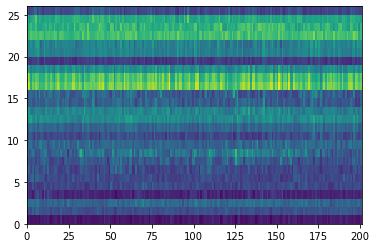

In [8]:
from BetaPose import utils, cluster
import pytraj as pt 
import numpy as np 
import matplotlib.pyplot as plt 

a="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.pdb"; 
b="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.nc"; 
traj = pt.load(b, top=a); 
traj.top.set_reference(traj[0]); 
pdist, y = utils.PairwiseDistance(traj, ":LIG&!@H=", ":LIG<@6&!:LIG&@C,CA,CB,N,O",use_mean=True); 

plt.pcolormesh(pdist)
clusters = cluster.ClusterAgglomerative(pdist, 10)
cluster_rand = cluster.RandomPerCluster(clusters, number=1)
print("The following frames are selected", cluster_rand)
# cluster.RMSDClusters(clusters, a, b); 
# cluster.RMSDGroup(cluster_rand, a, b); 




(26, 201)
[0 0 3 ... 2 3 2] 201


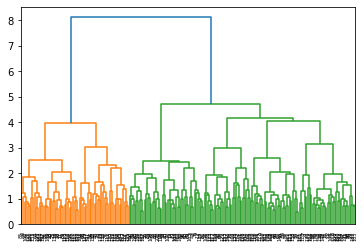

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

pdist

# pair_dist_sel = np.concatenate((dist_details["lig_atomids"], dist_details["pro_atomids"]))
# selrms = pt.rmsd(traj, mask="@"+",".join(pair_dist_sel.astype(str)))

# print(pair_dist_sel, len(pair_dist_sel))
# print(selrms)

clusterNr = 10
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(pdist.T, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=clusterNr, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict([pdist[:,i] for i in range(len(pdist.T))])
bins = np.unique(y_hc)
print(pdist.shape)
print(y_hc, len(y_hc))

In [27]:
import tmtools
from Bio.PDB.Polypeptide import three_to_one
print(dir(tmtools))

from tmtools.io import get_structure, get_residue_data
get_structure("/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/1ctu/1ctu_protein.pdb")
def sanitizeres(seq):
  mapping = {
    "HSD":"HIS","HSE":"HIS","HSP":"HIS","HID":"HIS","HIE":"HIS","HIP":"HIS",
  }
  outlst = []
  for i in seq: 
    if i in mapping.keys():
      outlst.append(mapping[i])
    else: 
      outlst.append(i)
  return outlst
def getseq(traj1, mask=":*"):
  cas = traj1.top.select(f"@CA&{mask}")
  caatoms = np.array([*traj1.top.atoms])[cas]
  resids = np.array([i.resid for i in caatoms])
  residues = np.array([*traj1.top.residues])[resids]
  res_three = sanitizeres([i.name for i in residues]); 
  res_one = [three_to_one(i) for i in res_three]; 
  return "".join(res_one)
def GetCACoord(traj1, idx, mask=":*"):
  return traj.xyz[idx][traj.top.select(f"@CA&{mask}")]
def GetMeanCACoord(traj1, mask=":*"):
  return np.mean(traj.xyz, axis=0)[traj.top.select(f"@CA&{mask}")]
  
print(GetMeanCACoord(traj).shape)

theseq = getseq(traj, ":LIG<:6")
print(theseq)
print(traj.xyz.shape)
tm_scores=[]
for i in range(len(traj.xyz)):
  tmout = tmtools.tm_align(GetMeanCACoord(traj, ":LIG<:6"), GetCACoord(traj,i, ":LIG<:6"), theseq,theseq)
  tm_scores.append(tmout.tm_norm_chain1)
tm_scores=np.array(tm_scores)
print(np.std(tm_scores))
clust_tm = ClusterAgglomerative(tm_scores.reshape(1, -1) , 10)
print(clust_tm)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_bindings', 'io', 'tm_align']
(221, 3)
DIGCGYGGLLEIRVSNAMKFLFPDHWITEEGK
(201, 41152, 3)
0.02903432057592061
[8 1 1 ... 1 7 6]


In [155]:
def ClusterAgglomerative(pdist, clusternr):
  """
    Cluster the distance values to {clusternr} classes
    [0 0 3 ... 2 3 2]  # 10 classes
  """
  hc = AgglomerativeClustering(n_clusters=clusternr, affinity = 'euclidean', linkage = 'ward'); 
  y_hc = hc.fit_predict(pdist.T); 
  return y_hc

def RandomPerCluster(cluster, number=1):
  """
    Choose {number} data points from each cluster
  """
  retlst = []
  for gp in np.unique(cluster):
    gp1 = [i for i,j in enumerate(cluster) if j == gp]; 
    randidx = np.random.choice(gp1, number)
    if number ==1: 
      retlst.append(int(randidx))
    elif number >1: 
      retlst += list(randidx)
  retlst.sort()
  return retlst

def RMSDClusters(cluster, pdbfile, trajfile):
  """
    Caluclate the RMSD values of the each clusters
    Examine the quality of clusters
  """
  rmsdlst=[]
  for gp in np.unique(cluster):
    gp1 = [i for i,j in enumerate(cluster) if j == gp]; 
    traj1 = pt.load(trajfile, top=pdbfile, frame_indices=gp1);
    traj1.superpose("@CA")
    print(f"Cluster {gp}: Selected frames: {len(gp1)} frames "); 
    #     print("==>", tm_scores[gp1])
    #     print("==>", np.std(tm_scores[gp1]))
    gprmsd = pt.rmsd(traj1, ":LIG&!@H="); 
    gpgyr = pt.radgyr(traj1, ":LIG&!@H="); 
    print(f"RMSD: {gprmsd.mean()}-{gprmsd.std()}\nROG: {gpgyr.mean()}-{gpgyr.std()}")
    rmsdlst.append(gprmsd.mean())
  print(f"Average RMSD: {np.mean(rmsdlst)}\n")
  return rmsdlst

def RMSDGroup(frames, pdbfile, trajfile):
  """
    Caluclate the RMSD values of certain frames 
    Examine the quality of clusters
  """
  traj1 = pt.load(trajfile, top=pdbfile, frame_indices=frames);
  rmsds = pt.rmsd(traj1, ":LIG&!@H="); 
  print(f">>> RMSD: {rmsds.mean()}-{rmsds.std()}\n")
  return rmsds
  

    
a="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.pdb"; 
b="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.nc";
x = ClusterAgglomerative(pdist, 10)
# x = clust_tm; 
# print([i for i in x])

RMSDClusters(x,a,b)
randnr = np.random.choice(np.arange(len(x)), size=10, replace=False)
randnr.sort()
print("Ramdom frames", [i for i in randnr])
RMSDGroup(randnr,a,b)
print("All frames: ")
RMSDGroup(range(len(x)),a,b)
print("Each from one cluster: ")
cluster_rand = RandomPerCluster(x, number=1)
print(cluster_rand)
RMSDGroup(cluster_rand,a,b)


NameError: name 'pdist' is not defined

In [68]:
from BetaPose import cluster
cluster.ClusterAgglomerative(pdist, 10)
cluster.RMSDClusters(x,a,b)

NameError: name 'np' is not defined

In [154]:
lst = []
for i in range(100): 
  randnr = np.random.choice(np.arange(len(x)), size=10, replace=False)
  randnr.sort()
  print("Ramdom frames", [i for i in randnr])
  rmsds = RMSDGroup(randnr,a,b)
  lst.append(rmsds.mean())
print(np.mean(lst))
plt.scatter(clust_tm, tm_scores)
# tm_scores=np.array(tm_scores)
# clust_tm

NameError: name 'x' is not defined

In [2]:

from BetaPose.features import feature

class massfeature(feature):
  def __init__(self):
    super(massfeature, self).__init__()
  def forward(self, frame): 
    """
    1. Get the atomic feature
    2. Update the feature 
    """
    pdb_atomic_numbers = np.array([i.atomic_number for i in self.top.atoms]).astype(int); 
    thisxyz = frame.xyz; 
    selxyz = thisxyz[self.searchlist]; 
    self.atom_mass = []; 
    
    cand_status = (distance_matrix(selxyz, self.featurizer.center.reshape(1,3)) <= self.featurizer.cutoff); 
    cand_status = cand_status.squeeze(); 
    cand_xyz    = selxyz[cand_status]; 
    cand_distmatrix = distance_matrix(self.featurizer.points3d, cand_xyz)
    cand_diststatus = cand_distmatrix < 1.75
    
    cand_index  = self.searchlist[cand_status]; 
    mins = np.min(cand_distmatrix, axis=1); 
    idx_lst = [np.where(cand_distmatrix[m] == mins[m])[0][0] if np.any(cand_diststatus[m,:]) else -1 for m in range(len(mins))]; 
    candlst = [cand_index[m] if m>=0 else -1 for m in idx_lst]; 
    
    atom_mass_frameN = [pdb_atomic_numbers[m] if m > 0 else 0 for m in candlst];
    atom_mass_frameN = self.featurizer.points_to_3D(atom_mass_frameN); 
    return np.array(atom_mass_frameN); 


# Available Modules: 
## - TRAJ Class for trajectory manipulation (For user end)
## - TrajectoryLoader trajectory iteration (For user end)
## - Representation generator (For developer end only)

<br>

# Modules to be Added 
## - Feature generator (For user end)
## - Database depositor (For developer end only)
## - Temporary Data storage (For developer end only)
## - Neural networks 

In [120]:
import open3d as o3d
from BetaPose import utils, chemtools, representations; 

# from BetaPose.representations import * 




In [1]:
from BetaPose import trajloader

trajs = "/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_001_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_002_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_003_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_004_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_005_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_006_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_007_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_008_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_009_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_traj.nc%"
trajs = trajs.strip("%").split("%")
tops = ["/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_END.pdb"] * 10
tloader = trajloader.TrajectoryLoader(trajs, tops)


# tloader[3:]
for traj in tloader[:3]:
  print(type(traj))
  
  break
  
  
  
for traj in tloader: 
  # Complete the trajectory information
  traj.addcharge(); 
  
  # Initialize the featurizer since different trajectory might have distinct parameters
  feat  = featurizer_3d(FEATURIZER_PARMS); 
  feature_mass = massfeature(); 
  feat.register_feature(feature_mass)
  
  # Select out frames
  frames = traj.cluster()
  for frame in frames: 
    # Pre-compute the needed centers
    centers = traj.xyz[frame][traj.top.select("@CA")]
    print(f"Generating {len(centers)} centers")
    
    feat.run_iter(traj, centers)
  break

<class 'BetaPose.TrajectoryLoader.TRAJ'>


slice(3, 5, None)

In [65]:
import builtins

In [1]:
import open3d as o3d
import time, builtins, tempfile, datetime, os 
from BetaPose import utils, chemtools, representations; 

import pytraj as pt 
import numpy as np 
from scipy.stats import entropy 
from scipy.ndimage import gaussian_filter 
from scipy.spatial import distance_matrix 

from BetaPose import utils, cluster
# Reload the print function and the log decorator
def logit(function):
  def adddate(*arg, **kwarg):
    timestamp = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S')
    builtins.print(f"{timestamp:20s}: ", end="")
    function(*arg, **kwarg)
  return adddate

@logit
def print(*arg, **kwarg):
  builtins.print(*arg, **kwarg)

########################################################
class featurizer_3d:
  def __init__(self, parms):
    self.FEATURES = []; 
    
    # Check the deinition of featurizer
    self.parms = parms; 
    try: 
      parms2check = ["VOXEL_DIMENSION", "CUBOID_LENGTH", "CUTOFF", "MASK_INTEREST", "MASK_ENVIRONMENT"]
      for parm in parms2check:
        parms[parm]; 
    except: 
      print(f"Please define the keyword <{parm}> in your parameter set")
      return
    
    self.__dims     = np.array([int(i) for i in parms["VOXEL_DIMENSION"]]);    # __pointnr
    self.__lengths  = np.array([float(i) for i in parms["CUBOID_LENGTH"]]); 
    self.__searchcutoff = float(parms["CUTOFF"]); 
    if isinstance(parms["MASK_INTEREST"], str):
      self.__MOI = parms["MASK_INTEREST"]
    else: 
      print("MASK_INTEREST is not a string. It should be a iterable object")
      
    if isinstance(parms["MASK_ENVIRONMENT"], str):
      self.__MOE = parms["MASK_ENVIRONMENT"]
    else: 
      print("MASK_ENVIRONMENT is not a string. It should be a iterable object")

    self.__distances = np.arange(np.prod(self.__dims)).astype(int);
    self.__points3d = self.get_points()
    self.__boxcenter = np.mean(self.__points3d, axis = 0); 
    self.__grid = np.arange(np.prod(self.__dims)).reshape(self.__dims)
    print("Center", self.__boxcenter)
    
  def __str__(self):
    finalstr = f"Feature Number: {len(self.FEATURES)}; \n"
    for i in self.FEATURES:
      finalstr += f"Feature: {i.__str__()}\n"
    return finalstr
    
  @property
  def shape(self):
    return (i for i in self.__dims)
  @property
  def center(self):
    return np.array(self.__boxcenter)
  @property
  def cutoff(self):
    return self.__searchcutoff
  
  @property
  def moi(self):
    return self.__MOI
  @property
  def moe(self):
    return self.__MOE
  @property
  def mask_int(self):
    return self.__MOI
  @property
  def mask_env(self):
    return self.__MOE
  
  @property
  def interval(self):
    return self.__interval
  @property
  def unitlength(self):
    return self.__unitlength
    
  def centerto(self, coord): 
    diff = coord - np.mean(self.__points3d, axis = 0); 
    self.__boxcenter += coord; 
    self.__points3d += diff; 
  
  def originto(self, coord): 
    diff = coord - np.mean(self.__points3d, axis = 0); 
    self.__boxcenter += diff; 
    self.__points3d += diff; 
    
  def translate(self, offsets, **kwarg):
    """
    Apply a translational movement to the cell box;
    """
    self.__boxcenter += offsets; 
    self.updatebox(); 
    return 
      
  def updatebox(self):
    """
    Avoid frequent use of the updatebox function because it generates new point set
    Only needed when changing the box parameter <VOXEL_DIMENSION> and <CUBOID_LENGTH>
    Basic variables: 
      self.__length
      self.__dims
    """
    self.__unitlength = self.__length / self.__dims; 
    self.__distances  = np.arange(np.prod(self.__dims)).astype(int); 
    self.__points3d  = self.get_points(); 
    self.__boxcenter  = np.mean(self.__points3d, axis = 0); 
    
  def dist2coordindex(self, point):
    k0 = self.__dims[1]*self.__dims[2]
    k1 = self.__dims[0]
    d0 = int(point / k0)
    d1 = int((point - d0*k0) / k1)
    d2 = int(point - d0*k0 - d1*k1)
    ret = np.array([d0, d1, d2])
    return ret
  
  def get_points(self):
    # Define grid parameters
    dimx = np.linspace(0, 1, self.__dims[0]); 
    dimy = np.linspace(0, 1, self.__dims[1]); 
    dimz = np.linspace(0, 1, self.__dims[2]); 
    # Generate grid points
    x, y, z = np.meshgrid(dimx, dimy, dimz, indexing='ij')
    coord = np.column_stack([x.ravel(), y.ravel(), z.ravel()])
    coord *= self.__lengths
    return coord
    
  def register_feature(self, feature):
    self.FEATURES.append(feature)
    
  def setboxlength(self, length):
    self.__length = float(length); 
    self.updatebox(); 
    
  def scaleboxlength(self, scalefactor):
    self.__length *= scalefactor; 
    self.updatebox(); 
  
  def points_to_3D(self, thearray, dtype=float):
    if len(self.__distances) != len(thearray):
      print("Cannot match the length of the array to the 3D cuboid"); 
      return np.array([0])
    template  = np.zeros((self.__pointnr, self.__pointnr, self.__pointnr)).astype(dtype);
    for ind in self.__distances:
      array_3Didx = tuple(self.__indexes3d[ind]); 
      template[array_3Didx] = thearray[ind]
    return template
  
  def write_box(self, pdbfile, elements=[], bfactors=[], write_pdb=False):
    if len(elements) == 0: 
      elements = ["Du"] * len(self.__distances); 
    if len(bfactors) == 0: 
      bfactors = [0.00] * len(self.__distances); 
    template = "ATOM      1  Du  TMP     1       0.000   0.000   0.000  1.00  0.00";
    if write_pdb and len(self.traj) > 0:
      with tempfile.NamedTemporaryFile(suffix=".pdb") as file1: 
        print(f"Writing out the active frame {self.trajloader.activeframe} with the box"); 
        newxyz = np.array([self.traj[self.trajloader.activeframe].xyz])
        newtraj = pt.Trajectory(xyz=newxyz , top=self.traj.top)
        pt.write_traj(file1.name, newtraj, overwrite=True)
        with open(file1.name, "r") as file2:
          pdblines = [i for i in file2.read().split("\n") if "ATOM" in i or "HETATM" in i]
        pdbline = "\n".join(pdblines)+"\n"
    else: 
      print(f"Writing out the box"); 
      pdbline = ""; 
    coordinates = np.round(self.__points3d, decimals=3); 
    for i in self.__distances:
      point = self.__points3d[i]; 
      elem  = elements[i]; 
      bfval = bfactors[i]; 
      tmpstr = "".join([f"{i:>8.3f}" for i in point]); 
      thisline = f"ATOM  {i:>5}  {elem:<3}{template[16:30]}{tmpstr}{template[54:60]}{round(bfval,2):>6}\n"
      pdbline += thisline
    with open(pdbfile, "w") as file1:
      file1.write(pdbline)
    return pdbline
  
  def run_iter(self, trajloader):
    print("Iterate through all trajectories")
    for traj in trajloader:
      print(f"{self.run_iter.__name__}: Frame number before trajectory slicing: {len(traj.traj)}")
      indices_after_cluster = traj.cluster(mask=self.__mask); 
      traj.slicetraj(indices_after_cluster); 
      print(f"{self.run_iter.__name__}: Frame number after trajectory slicing: {len(traj.traj)} ; indices kept: {indices_after_cluster}", )
      self.traj = traj.traj; 
      self.trajloader = traj; 
      # One translate operation in one trajectory only. 
      self.translate(**self.parms); 
      print("Featurize the trajectory ......"); 
      for f in self.FEATURES:
        # Hook the featurizer to the individual feature functions and let it access the featurizer settings
        f.hook(self); 
        arr = f.run(traj); 
    print("Iterated all trajectories")
    
  def runframe(self, traj, index, centers):
    dim = [len(centers),len(self.FEATURES), *self.__dims]; 
    dim = [len(centers), 1, *self.__dims]; 
    ret = np.zeros(dim)
    
    repres = representations.repr_generator(traj)
    
    for center in centers: 
      self.originto(center)
      # print(f"Position: {center}, {self.__lengths}")
      ############################## Reset center, frame index, cell length ##############################
      repres.center = [i for i in center]; 
      repres.length = [i for i in self.__lengths]; 
      repres.frame = index; 
      ########################### Segment the box and generate feature vectors ###########################
      slices, segments = repres.slicebyframe(); 
      feature_vector, mesh_obj, fpfh = repres.vectorize(segments); 
      
      print(feature_vector)
      # for fidx, feature in enumerate(self.FEATURES):
      for fidx, feature in enumerate(range(1)):
        
        
        print(fidx, center, self.__lengths)
    return ret


INFO - 2023-03-20 14:59:07,842 - __init__ - Enabling RDKit 2021.09.5 jupyter extensions


In [2]:
FEATURIZER_PARMS = {
  # Mask of components 
  "MASK_INTEREST" : ":LIG,MDL", 
  "MASK_ENVIRONMENT" : ":1-221",
  
  # POCKET SETTINGS
  "VOXEL_DIMENSION" : [12, 12, 12],    # Unit: 1 (Number of lattice in one dimension)
  "CUBOID_LENGTH" : (8,8,8),           # Unit: Angstorm (Need scaling)
  "TRAJ_PADDING" : 5,                  # Unit: Percent (%)
  
  # SEARCH SETTINGS
  "UPDATE_INTERVAL" : 1, 
  "CUTOFF": 18, 
}

# Example workflow

from BetaPose import trajloader
# Load multiple trajectories

trajs = "/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_001_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_002_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_003_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_004_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_005_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_006_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_007_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_008_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_009_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_traj.nc%"
trajs = trajs.strip("%").split("%")
tops = ["/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_END.pdb"] * 10
tloader = trajloader.TrajectoryLoader(trajs, tops);
trajectories = trajloader.TrajectoryLoader(trajs, tops); 

for traj in trajectories: 
  # Complete the trajectory information
  traj.strip(":T3P")
  print(traj.traj)
  # traj.addcharge(); 
  
  # Initialize the featurizer since different trajectory might have distinct parameters
  feat  = featurizer_3d(FEATURIZER_PARMS); 
  # feature_mass = massfeature(); 
  # feat.register_feature(feature_mass)
  
  # Select out frames
  # frames = traj.cluster()
  # for frame in frames: 
  for frame in range(1,50,2): 
    centers = traj.xyz[frame][traj.top.select("@CA")]
    print(f"Frame{frame}: Generating {len(centers)} centers")
    ## Each frame Runs len(centers) computation/segmentaiton
    feature_framei = feat.runframe(traj, frame, centers)
  break


23-03-20T14:59:09   : pytraj.Trajectory, 1001 frames: 
Size: 0.056316 (GB)
<Topology: 2517 atoms, 188 residues, 38 mols, PBC with box type = cubic>
           
23-03-20T14:59:09   : Center [4. 4. 4.]
23-03-20T14:59:09   : Frame1: Generating 151 centers
Found the MSMS executable /home/yzhang/Downloads/msms_i86_64Linux2_2.6.1/msms.x86_64Linux2.2.6.1
23-03-20T14:59:09   : [27.  8.  2. ...  0.  0.  0.]
23-03-20T14:59:09   : 0 [30.04491615 12.31563759 38.58736801] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:09   : [30. 10.  4. ...  0.  0.  0.]
23-03-20T14:59:09   : 0 [28.00493622  9.84861851 36.47812653] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:09   : [29.  9.  4. ...  0.  0.  0.]
23-03-20T14:59:09   : 0 [24.37053299 10.81754208 37.29156876] [8. 8. 8.]
23-03-20T14:59:10   : [27.  8.  2. ...  0.  0.  0.]
23-03-20T14:59:10   : 0 [24.26010132 14.45656967 38.30160904] [8. 8. 8.]
23-03-20T14:59:10   : [34. 10.  5. ...  0.  0.  0.]
23-03-20T14:59:10   : 0 [22.22748184 16.46862411 40.82053757] [8. 8. 8.]
23-03-20T14:59:10   : [33.  9.  3. ...  0.  0.  0.]
23-03-20T14:59:10   : 0 [21.9687767  20.2562027  40.91333008] [8. 8. 8.]
23-03-20T14:59:11   : [35. 12.  4. ...  0.  0.  0.]
23-03-20T14:59:11   : 0 [25.194067   20.38790321 43.15146637] [8. 8. 8.]
23-03-20T14:59:11   : [48. 18.  4. ...  0.  0.  0.]
23-03-20T14:59:11   : 0 [27.43847847 19.00323677 40.39988327] [8. 8. 8.]
23-03-20T14:59:11   : [54. 18.  4. ...  0.  0.  0.]
23-03-20T14:59:11   : 0 [25.996521   20.95663261 37.4601059 ] [8. 8. 8.]
23-03-20T14:59:12   : [45. 16.  3. ...  0.  0.  0.]
23-03-20T14:59:12   : 0 [26.19683075 24.24141121 39.42975235] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:13   : [43. 13.  5. ...  0.  0.  0.]
23-03-20T14:59:13   : 0 [29.49731064 26.68389511 36.09909439] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:13   : [52. 18.  7. ...  0.  0.  0.]
23-03-20T14:59:13   : 0 [31.13197517 28.32229042 39.04170227] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:14   : [42. 15.  4. ...  0.  0.  0.]
23-03-20T14:59:14   : 0 [34.58332443 26.80475044 38.40034103] [8. 8. 8.]
23-03-20T14:59:14   : [38. 14.  4. ...  0.  0.  0.]
23-03-20T14:59:14   : 0 [34.36597061 27.76417542 34.66477585] [8. 8. 8.]
23-03-20T14:59:15   : [53. 20.  4. ...  0.  0.  0.]
23-03-20T14:59:15   : 0 [33.78185272 31.47978783 35.28551483] [8. 8. 8.]
23-03-20T14:59:15   : [41. 12.  4. ...  0.  0.  0.]
23-03-20T14:59:15   : 0 [37.20148849 31.84290886 37.07814789] [8. 8. 8.]
23-03-20T14:59:15   : [30.  9.  4. ...  0.  0.  0.]
23-03-20T14:59:15   : 0 [39.01400375 32.12795639 33.71100616] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:15   : [43. 16.  3. ...  0.  0.  0.]
23-03-20T14:59:15   : 0 [36.30973053 34.4393692  32.34163666] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:16   : [45. 14.  4. ...  0.  0.  0.]
23-03-20T14:59:16   : 0 [35.26150131 37.05534744 34.94086075] [8. 8. 8.]
23-03-20T14:59:16   : [35. 11.  4. ...  0.  0.  0.]
23-03-20T14:59:16   : 0 [37.53079224 38.85687637 37.37480927] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:16   : [39. 14.  1. ...  0.  0.  0.]
23-03-20T14:59:16   : 0 [36.72319412 37.25904846 40.90491486] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:17   : [30. 11.  1. ...  0.  0.  0.]
23-03-20T14:59:17   : 0 [38.49064636 38.71212769 43.96339417] [8. 8. 8.]
23-03-20T14:59:17   : [39. 15.  2. ...  0.  0.  0.]
23-03-20T14:59:17   : 0 [38.087883   35.42848587 45.75737381] [8. 8. 8.]
23-03-20T14:59:17   : [29.  9.  2. ...  0.  0.  0.]
23-03-20T14:59:17   : 0 [40.6660881  32.74469376 44.40673828] [8. 8. 8.]
23-03-20T14:59:17   : [22.  8.  3. ...  0.  0.  0.]
23-03-20T14:59:17   : 0 [39.8186264  29.3686676  42.70310593] [8. 8. 8.]
23-03-20T14:59:18   : [26.  7.  4. ...  0.  0.  0.]
23-03-20T14:59:18   : 0 [43.10286713 27.5678463  42.05650711] [8. 8. 8.]
23-03-20T14:59:18   : [26.  9.  3. ...  0.  0.  0.]
23-03-20T14:59:18   : 0 [43.80105591 24.01901627 40.86151123] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:18   : [29. 10.  2. ...  0.  0.  0.]
23-03-20T14:59:18   : 0 [41.17253494 22.33877182 38.70870972] [8. 8. 8.]
23-03-20T14:59:18   : [37.  9.  6. ...  0.  0.  0.]
23-03-20T14:59:18   : 0 [40.50481033 18.69034958 37.94623947] [8. 8. 8.]
23-03-20T14:59:19   : [39. 11.  5. ...  0.  0.  0.]
23-03-20T14:59:19   : 0 [39.25222397 16.78602791 34.90512466] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:19   : [41. 12.  7. ...  0.  0.  0.]
23-03-20T14:59:19   : 0 [35.526371   17.83255577 34.26714706] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:20   : [38. 11.  4. ...  0.  0.  0.]
23-03-20T14:59:20   : 0 [36.02679443 21.51543236 35.4490509 ] [8. 8. 8.]
23-03-20T14:59:20   : [53. 19.  5. ...  0.  0.  0.]
23-03-20T14:59:20   : 0 [39.36309814 21.5476265  33.58880234] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:20   : [50. 16.  3. ...  0.  0.  0.]
23-03-20T14:59:20   : 0 [37.93180847 20.28302193 30.26960182] [8. 8. 8.]
23-03-20T14:59:21   : [53. 17.  7. ...  0.  0.  0.]
23-03-20T14:59:21   : 0 [35.10821152 22.73925972 30.56401634] [8. 8. 8.]
23-03-20T14:59:21   : [38. 13.  3. ...  0.  0.  0.]
23-03-20T14:59:21   : 0 [37.70147705 25.61568642 30.96704674] [8. 8. 8.]
23-03-20T14:59:22   : [42. 12.  7. ...  0.  0.  0.]
23-03-20T14:59:22   : 0 [39.45430756 24.13969803 27.87501526] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:22   : [41. 10.  3. ...  0.  0.  0.]
23-03-20T14:59:22   : 0 [36.48270035 23.5635376  25.50611496] [8. 8. 8.]
23-03-20T14:59:22   : [32.  9.  5. ...  0.  0.  0.]
23-03-20T14:59:22   : 0 [33.98070908 26.38998795 26.54188728] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:23   : [45. 19.  4. ...  0.  0.  0.]
23-03-20T14:59:23   : 0 [36.26444626 29.43521118 27.25200081] [8. 8. 8.]
23-03-20T14:59:23   : [39. 10.  7. ...  0.  0.  0.]
23-03-20T14:59:23   : 0 [38.12521744 29.01797676 24.01472473] [8. 8. 8.]
23-03-20T14:59:24   : [48. 15.  3. ...  0.  0.  0.]
23-03-20T14:59:24   : 0 [34.80123138 28.95939255 22.05927658] [8. 8. 8.]
23-03-20T14:59:24   : [48. 15.  7. ...  0.  0.  0.]
23-03-20T14:59:24   : 0 [33.41427231 31.96725655 24.02676392] [8. 8. 8.]
23-03-20T14:59:24   : [53. 15.  8. ...  0.  0.  0.]
23-03-20T14:59:24   : 0 [36.5049324  34.08751678 22.99563408] [8. 8. 8.]
23-03-20T14:59:25   : [43. 15.  4. ...  0.  0.  0.]
23-03-20T14:59:25   : 0 [35.79477692 33.37971878 19.24862289] [8. 8. 8.]
23-03-20T14:59:25   : [44. 13.  4. ...  0.  0.  0.]
23-03-20T14:59:25   : 0 [32.09243393 33.84049606 19.62323952] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:26   : [45. 17.  6. ...  0.  0.  0.]
23-03-20T14:59:26   : 0 [32.5827179  37.12828445 21.59076309] [8. 8. 8.]
23-03-20T14:59:26   : [43. 12.  4. ...  0.  0.  0.]
23-03-20T14:59:26   : 0 [34.88775635 38.64504623 18.9447403 ] [8. 8. 8.]
23-03-20T14:59:26   : [36. 11.  4. ...  0.  0.  0.]
23-03-20T14:59:26   : 0 [32.77472687 37.77474213 15.95517826] [8. 8. 8.]
23-03-20T14:59:26   : [49. 15.  5. ...  0.  0.  0.]
23-03-20T14:59:26   : 0 [29.36396599 38.83563614 17.39386177] [8. 8. 8.]
23-03-20T14:59:27   : [56. 18.  6. ...  0.  0.  0.]
23-03-20T14:59:27   : 0 [30.7136116  42.00475311 19.09640694] [8. 8. 8.]
23-03-20T14:59:27   : [37. 10.  7. ...  0.  0.  0.]
23-03-20T14:59:27   : 0 [28.29456711 44.30536652 17.05753708] [8. 8. 8.]
23-03-20T14:59:27   : [40.  9.  5. ...  0.  0.  0.]
23-03-20T14:59:27   : 0 [25.44554138 41.9500618  17.97523308] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:28   : [40. 12.  3. ...  0.  0.  0.]
23-03-20T14:59:28   : 0 [26.55080032 42.12518311 21.65943527] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:28   : [27. 11.  3. ...  0.  0.  0.]
23-03-20T14:59:28   : 0 [27.10128784 45.99188232 21.74543381] [8. 8. 8.]
23-03-20T14:59:28   : [33. 11.  4. ...  0.  0.  0.]
23-03-20T14:59:28   : 0 [23.56512451 46.50018692 20.29941177] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:28   : [31. 10.  3. ...  0.  0.  0.]
23-03-20T14:59:28   : 0 [21.34857368 45.25380707 23.12111664] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:29   : [31. 10.  3. ...  0.  0.  0.]
23-03-20T14:59:29   : 0 [21.74751663 46.85906219 26.61472511] [8. 8. 8.]
23-03-20T14:59:29   : [30. 10.  2. ...  0.  0.  0.]
23-03-20T14:59:29   : 0 [22.1074543  44.12049866 29.54218674] [8. 8. 8.]
23-03-20T14:59:29   : [30. 11.  3. ...  0.  0.  0.]
23-03-20T14:59:29   : 0 [21.06341553 46.51187897 32.3944664 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:30   : [41. 12.  7. ...  0.  0.  0.]
23-03-20T14:59:30   : 0 [19.33492851 44.54450226 35.28935623] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:30   : [43. 11.  5. ...  0.  0.  0.]
23-03-20T14:59:30   : 0 [18.98138428 40.78800583 36.30520248] [8. 8. 8.]
23-03-20T14:59:30   : [49. 15.  9. ...  0.  0.  0.]
23-03-20T14:59:30   : 0 [15.52209282 40.52147675 34.69695282] [8. 8. 8.]
23-03-20T14:59:31   : [49. 14.  7. ...  0.  0.  0.]
23-03-20T14:59:31   : 0 [16.97470665 41.76900101 31.34752274] [8. 8. 8.]
23-03-20T14:59:31   : [45. 15.  6. ...  0.  0.  0.]
23-03-20T14:59:31   : 0 [19.78491402 39.04312134 31.57273674] [8. 8. 8.]
23-03-20T14:59:32   : [48. 15.  4. ...  0.  0.  0.]
23-03-20T14:59:32   : 0 [17.09952545 36.39632797 32.57202148] [8. 8. 8.]
23-03-20T14:59:32   : [40. 11.  6. ...  0.  0.  0.]
23-03-20T14:59:32   : 0 [14.56780529 37.51358795 29.85538101] [8. 8. 8.]
23-03-20T14:59:32   : [55. 16.  6. ...  0.  0.  0.]
23-03-20T14:59:32   : 0 [17.3968544  37.72680664 27.2667675 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:33   : [41. 14.  5. ...  0.  0.  0.]
23-03-20T14:59:33   : 0 [18.67985535 34.19040298 28.10549164] [8. 8. 8.]
23-03-20T14:59:33   : [47. 13.  7. ...  0.  0.  0.]
23-03-20T14:59:33   : 0 [15.12014294 32.91386032 27.73796654] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:34   : [52. 16.  7. ...  0.  0.  0.]
23-03-20T14:59:34   : 0 [14.49690819 34.70677567 24.38691711] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:34   : [48. 15.  5. ...  0.  0.  0.]
23-03-20T14:59:34   : 0 [17.78260231 33.16212082 22.93665504] [8. 8. 8.]
23-03-20T14:59:34   : [46. 14.  3. ...  0.  0.  0.]
23-03-20T14:59:34   : 0 [17.58921051 29.60905266 24.26002502] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:35   : [37. 10.  6. ...  0.  0.  0.]
23-03-20T14:59:35   : 0 [13.91803837 28.65125275 24.14682198] [8. 8. 8.]
23-03-20T14:59:35   : [35. 13.  4. ...  0.  0.  0.]
23-03-20T14:59:35   : 0 [12.28312492 31.28556061 21.77151299] [8. 8. 8.]
23-03-20T14:59:35   : [37. 13.  4. ...  0.  0.  0.]
23-03-20T14:59:35   : 0 [15.06901646 31.80962372 19.19355583] [8. 8. 8.]
23-03-20T14:59:36   : [27. 11.  3. ...  0.  0.  0.]
23-03-20T14:59:36   : 0 [17.320755   28.63861847 19.00250816] [8. 8. 8.]
23-03-20T14:59:36   : [28. 11.  2. ...  0.  0.  0.]
23-03-20T14:59:36   : 0 [15.37486744 25.39904022 17.71952248] [8. 8. 8.]
23-03-20T14:59:36   : [27.  9.  4. ...  0.  0.  0.]
23-03-20T14:59:36   : 0 [14.05995083 22.81167412 20.21732903] [8. 8. 8.]
23-03-20T14:59:36   : [25.  9.  4. ...  0.  0.  0.]
23-03-20T14:59:36   : 0 [15.91776752 19.4265728  20.55645943] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:36   : [36. 12.  3. ...  0.  0.  0.]
23-03-20T14:59:36   : 0 [17.89835167 17.14984322 22.84429359] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:37   : [38. 13.  4. ...  0.  0.  0.]
23-03-20T14:59:37   : 0 [20.4628582  19.15365219 24.90874481] [8. 8. 8.]
23-03-20T14:59:37   : [45. 15.  5. ...  0.  0.  0.]
23-03-20T14:59:37   : 0 [23.70723915 17.29938889 24.20509911] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:37   : [35. 11.  2. ...  0.  0.  0.]
23-03-20T14:59:37   : 0 [27.40260696 17.98717499 23.14326859] [8. 8. 8.]
23-03-20T14:59:38   : [35. 11.  5. ...  0.  0.  0.]
23-03-20T14:59:38   : 0 [27.46313477 21.42894745 21.27203178] [8. 8. 8.]
23-03-20T14:59:38   : [50. 13.  8. ...  0.  0.  0.]
23-03-20T14:59:38   : 0 [24.38043976 22.82824707 22.92344284] [8. 8. 8.]
23-03-20T14:59:38   : [49. 16.  3. ...  0.  0.  0.]
23-03-20T14:59:38   : 0 [25.7195797  22.53024101 26.46323395] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:39   : [53. 18.  7. ...  0.  0.  0.]
23-03-20T14:59:39   : 0 [28.9232502  24.20630646 25.21183395] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:39   : [45. 13.  5. ...  0.  0.  0.]
23-03-20T14:59:39   : 0 [26.74369431 26.88276482 23.6333847 ] [8. 8. 8.]
23-03-20T14:59:40   : [43. 14.  4. ...  0.  0.  0.]
23-03-20T14:59:40   : 0 [24.9611721  27.54829216 26.98304176] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:40   : [43. 16.  5. ...  0.  0.  0.]
23-03-20T14:59:40   : 0 [28.27117538 27.99002457 28.93815422] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:41   : [35. 11.  4. ...  0.  0.  0.]
23-03-20T14:59:41   : 0 [29.83851814 30.10921097 26.10480499] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:41   : [43. 15.  5. ...  0.  0.  0.]
23-03-20T14:59:41   : 0 [26.64792824 32.26155472 26.3829422 ] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:42   : [40. 11.  5. ...  0.  0.  0.]
23-03-20T14:59:42   : 0 [26.73569679 32.37261963 30.32983589] [8. 8. 8.]
23-03-20T14:59:42   : [39. 13.  6. ...  0.  0.  0.]
23-03-20T14:59:42   : 0 [30.25307655 33.7944603  30.5855732 ] [8. 8. 8.]
23-03-20T14:59:43   : [50. 16.  4. ...  0.  0.  0.]
23-03-20T14:59:43   : 0 [29.45588493 36.5388031  28.04589462] [8. 8. 8.]
23-03-20T14:59:43   : [50. 17.  5. ...  0.  0.  0.]
23-03-20T14:59:43   : 0 [26.0889225  37.33024216 29.62050629] [8. 8. 8.]
23-03-20T14:59:44   : [46.         17.          3.         ...  6.58849753  1.16240396
  0.79166667]
23-03-20T14:59:44   : 0 [27.4823494  37.63770676 33.23878098] [8. 8. 8.]
23-03-20T14:59:44   : [48. 18.  6. ...  0.  0.  0.]
23-03-20T14:59:44   : 0 [30.23944664 39.87653351 31.89320564] [8. 8. 8.]
23-03-20T14:59:44   : [41. 12.  3. ...  0.  0.  0.]
23-03-20T14:59:44   : 0 [27.7036171  42.00863647 30.05524445] [8. 8. 8.]
23-03-20T14:59:45   : [39. 11.  5. ...  0.  0.  0.]
23-03-20T14:59:45   : 0 

    Couldn't find first face trying -all option


23-03-20T14:59:45   : [42. 15.  3. ...  0.  0.  0.]
23-03-20T14:59:45   : 0 [28.37390137 43.64163208 35.13346863] [8. 8. 8.]
23-03-20T14:59:46   : [40. 14.  5. ...  0.  0.  0.]
23-03-20T14:59:46   : 0 [28.058321   47.32778931 34.14450836] [8. 8. 8.]
23-03-20T14:59:46   : [33. 11.  4. ...  0.  0.  0.]
23-03-20T14:59:46   : 0 [30.43809509 49.70737839 36.0982132 ] [8. 8. 8.]
23-03-20T14:59:46   : [36. 11.  4. ...  0.  0.  0.]
23-03-20T14:59:46   : 0 [32.67396927 48.03991699 38.60447311] [8. 8. 8.]
23-03-20T14:59:46   : [41. 15.  3. ...  0.  0.  0.]
23-03-20T14:59:46   : 0 [35.46676254 45.34021759 37.85500336] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:47   : [31. 12.  2. ...  0.  0.  0.]
23-03-20T14:59:47   : 0 [34.64390182 42.49669266 40.26470947] [8. 8. 8.]
23-03-20T14:59:47   : [31. 10.  2. ...  0.  0.  0.]
23-03-20T14:59:47   : 0 [31.16177368 40.69837952 40.19152451] [8. 8. 8.]
23-03-20T14:59:47   : [35. 10.  4. ...  0.  0.  0.]
23-03-20T14:59:47   : 0 [29.01811028 40.39351273 43.37742615] [8. 8. 8.]
23-03-20T14:59:48   : [47. 15.  5. ...  0.  0.  0.]
23-03-20T14:59:48   : 0 [25.92163277 38.31807327 43.67823792] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:48   : [39. 14.  5. ...  0.  0.  0.]
23-03-20T14:59:48   : 0 [23.49777031 39.74084091 41.10135651] [8. 8. 8.]
23-03-20T14:59:48   : [42. 12.  6. ...  0.  0.  0.]
23-03-20T14:59:48   : 0 [25.90707588 38.84293747 38.34122849] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:49   : [40. 16.  5. ...  0.  0.  0.]
23-03-20T14:59:49   : 0 [28.03483963 35.7930336  39.14530182] [8. 8. 8.]
23-03-20T14:59:49   : [48. 14.  6. ...  0.  0.  0.]
23-03-20T14:59:49   : 0 [25.92259979 33.97216034 41.73990631] [8. 8. 8.]
23-03-20T14:59:50   : [42. 15.  4. ...  0.  0.  0.]
23-03-20T14:59:50   : 0 [22.28879547 34.5121994  40.66193008] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:50   : [40. 13.  3. ...  0.  0.  0.]
23-03-20T14:59:50   : 0 [22.56443405 34.16604614 36.84258652] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T14:59:51   : [46. 16.  7. ...  0.  0.  0.]
23-03-20T14:59:51   : 0 [24.91716194 31.21940041 37.10349274] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:51   : [43. 16.  4. ...  0.  0.  0.]
23-03-20T14:59:51   : 0 [22.50507736 29.34238243 39.64295197] [8. 8. 8.]
23-03-20T14:59:51   : [46. 19.  4. ...  0.  0.  0.]
23-03-20T14:59:51   : 0 [19.68897057 29.98974037 37.028862  ] [8. 8. 8.]
23-03-20T14:59:52   : [59. 22.  6. ...  0.  0.  0.]
23-03-20T14:59:52   : 0 [21.73856354 28.88848877 34.02346802] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:52   : [43. 15.  4. ...  0.  0.  0.]
23-03-20T14:59:52   : 0 [22.88516426 25.72226524 35.87981796] [8. 8. 8.]
23-03-20T14:59:53   : [43. 13.  5. ...  0.  0.  0.]
23-03-20T14:59:53   : 0 [19.20864105 25.08598709 36.85743332] [8. 8. 8.]
23-03-20T14:59:53   : [47. 18.  5. ...  0.  0.  0.]
23-03-20T14:59:53   : 0 [18.28923035 25.2728157  33.11797333] [8. 8. 8.]
23-03-20T14:59:53   : [48. 17.  5. ...  0.  0.  0.]
23-03-20T14:59:53   : 0 [20.99729347 22.83913231 32.10137939] [8. 8. 8.]
23-03-20T14:59:54   : [43. 14.  4. ...  0.  0.  0.]
23-03-20T14:59:54   : 0 [20.28592682 20.12738228 34.90044785] [8. 8. 8.]
23-03-20T14:59:54   : [38. 12.  5. ...  0.  0.  0.]
23-03-20T14:59:54   : 0 [16.55500984 20.38487053 33.81672287] [8. 8. 8.]
23-03-20T14:59:54   : [30. 10.  4. ...  0.  0.  0.]
23-03-20T14:59:54   : 0 [16.8010006  20.0246067  30.02605247] [8. 8. 8.]
23-03-20T14:59:55   : [41. 15.  4. ...  0.  0.  0.]
23-03-20T14:59:55   : 0 [19.91418457 17.73046494 29.90153885] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:58   : [48. 18.  6. ...  0.  0.  0.]
23-03-20T14:59:58   : 0 [30.46689987 14.08210087 31.80496025] [8. 8. 8.]
23-03-20T14:59:58   : [39. 14.  4. ...  0.  0.  0.]
23-03-20T14:59:58   : 0 [32.72509384 11.50347042 33.33497238] [8. 8. 8.]
23-03-20T14:59:58   : [40. 11.  6. ...  0.  0.  0.]
23-03-20T14:59:58   : 0 [32.09962082  8.52213383 31.09595108] [8. 8. 8.]
23-03-20T14:59:59   : [46. 15.  5. ...  0.  0.  0.]
23-03-20T14:59:59   : 0 [31.27363586 10.76305294 28.00679016] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T14:59:59   : [43. 18.  5. ...  0.  0.  0.]
23-03-20T14:59:59   : 0 [32.55410767 14.38987732 27.74253082] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:00   : [43. 14.  4. ...  0.  0.  0.]
23-03-20T15:00:00   : 0 [35.90600967 13.64896297 29.64389992] [8. 8. 8.]
23-03-20T15:00:00   : [38. 13.  3. ...  0.  0.  0.]
23-03-20T15:00:00   : 0 [36.54081345 10.64105892 27.3904705 ] [8. 8. 8.]
23-03-20T15:00:00   : [41. 15.  3. ...  0.  0.  0.]
23-03-20T15:00:00   : 0 [35.07847977 12.54035568 24.32279205] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:01   : [41. 18.  3. ...  0.  0.  0.]
23-03-20T15:00:01   : 0 [37.34654617 15.66219902 24.36733246] [8. 8. 8.]
23-03-20T15:00:01   : [37. 13.  2. ...  0.  0.  0.]
23-03-20T15:00:01   : 0 [40.39375305 15.65278149 26.66929626] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:01   : [35. 13.  3. ...  0.  0.  0.]
23-03-20T15:00:01   : 0 [41.20694351 17.58658791 29.83909416] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:02   : [32. 11.  3. ...  0.  0.  0.]
23-03-20T15:00:02   : 0 [44.52313614 19.08963013 28.68517303] [8. 8. 8.]
23-03-20T15:00:02   : Frame3: Generating 151 centers
Found the MSMS executable /home/yzhang/Downloads/msms_i86_64Linux2_2.6.1/msms.x86_64Linux2.2.6.1
23-03-20T15:00:02   : [25.  7.  2. ...  0.  0.  0.]
23-03-20T15:00:02   : 0 [30.87704277 11.82290649 37.32260513] [8. 8. 8.]
23-03-20T15:00:02   : [33. 10.  5. ...  0.  0.  0.]
23-03-20T15:00:02   : 0 [28.42562485  9.35919476 35.56645203] [8. 8. 8.]
23-03-20T15:00:03   : [30.  9.  4. ...  0.  0.  0.]
23-03-20T15:00:03   : 0 [24.83745575 10.02200127 36.9474411 ] [8. 8. 8.]
23-03-20T15:00:03   : [38. 13.  2. ...  0.  0.  0.]
23-03-20T15:00:03   : 0 [24.96128273 13.74203777 37.40330124] [8. 8. 8.]
23-03-20T15:00:03   : [36. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:03   : 0 [23.08369827 15.95296001 39.92048264] [8. 8. 8.]
23-03-20T15:00:03   : [39. 14.  4. ...  0.  0.  0.]
23-03-20T15:00:03   : 0 [21.85834885 19.49987411

    Couldn't find first face trying -all option


23-03-20T15:00:06   : [53. 16.  6. ...  0.  0.  0.]
23-03-20T15:00:06   : 0 [30.62584686 22.92523384 36.70150375] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:06   : [39. 13.  6. ...  0.  0.  0.]
23-03-20T15:00:06   : 0 [29.2216835  26.46300507 35.85592651] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:07   : [52. 17.  8. ...  0.  0.  0.]
23-03-20T15:00:07   : 0 [30.92106628 27.95751953 38.87687683] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:07   : [43. 13.  4. ...  0.  0.  0.]
23-03-20T15:00:07   : 0 [34.34476471 26.13056374 38.12533569] [8. 8. 8.]
23-03-20T15:00:07   : [42. 15.  6. ...  0.  0.  0.]
23-03-20T15:00:07   : 0 [33.93703461 27.3876152  34.61836243] [8. 8. 8.]
23-03-20T15:00:08   : [54. 20.  4. ...  0.  0.  0.]
23-03-20T15:00:08   : 0 [33.47128677 31.10931015 35.41319275] [8. 8. 8.]
23-03-20T15:00:08   : [40. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:08   : 0 [36.82828522 31.04610634 37.16669846] [8. 8. 8.]
23-03-20T15:00:08   : [32. 10.  4. ...  0.  0.  0.]
23-03-20T15:00:08   : 0 [38.31007767 31.49710655 33.78730392] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:09   : [44. 17.  3. ...  0.  0.  0.]
23-03-20T15:00:09   : 0 [35.83169556 34.08235168 32.36160278] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:09   : [42. 15.  3. ...  0.  0.  0.]
23-03-20T15:00:09   : 0 [35.70921326 36.58324814 35.34925079] [8. 8. 8.]
23-03-20T15:00:09   : [34. 11.  4. ...  0.  0.  0.]
23-03-20T15:00:09   : 0 [38.31882477 38.19290924 37.47441483] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:10   : [40. 14.  1. ...  0.  0.  0.]
23-03-20T15:00:10   : 0 [37.3641243  36.68587875 40.89720535] [8. 8. 8.]
23-03-20T15:00:10   : [31. 12.  1. ...  0.  0.  0.]
23-03-20T15:00:10   : 0 [39.66039658 38.03929138 43.80234528] [8. 8. 8.]
23-03-20T15:00:10   : [35. 13.  2. ...  0.  0.  0.]
23-03-20T15:00:10   : 0 [39.78314209 34.72938538 45.84280396] [8. 8. 8.]
23-03-20T15:00:10   : [26.  9.  2. ...  0.  0.  0.]
23-03-20T15:00:10   : 0 [42.31452942 32.34049225 44.0385437 ] [8. 8. 8.]
23-03-20T15:00:10   : [22.  8.  2. ...  0.  0.  0.]
23-03-20T15:00:10   : 0 [41.59342957 28.58540154 44.14945984] [8. 8. 8.]
23-03-20T15:00:11   : [23.  6.  4. ...  0.  0.  0.]
23-03-20T15:00:11   : 0 [43.13615417 26.16487694 41.78339005] [8. 8. 8.]
23-03-20T15:00:11   : [25.  8.  3. ...  0.  0.  0.]
23-03-20T15:00:11   : 0 [41.96697235 22.45401764 41.87793732] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:11   : [29. 10.  3. ...  0.  0.  0.]
23-03-20T15:00:11   : 0 [40.83143616 20.73035622 38.6867981 ] [8. 8. 8.]
23-03-20T15:00:11   : [41. 12.  7. ...  0.  0.  0.]
23-03-20T15:00:11   : 0 [39.45909882 17.21859169 38.11165237] [8. 8. 8.]
23-03-20T15:00:12   : [40. 11.  5. ...  0.  0.  0.]
23-03-20T15:00:12   : 0 [39.59056854 15.83099937 34.59963226] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:12   : [40.         13.          7.         ...  6.58849753  1.16330337
  0.79      ]
23-03-20T15:00:12   : 0 [36.08620453 16.967659   33.64717865] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:13   : [50. 13.  8. ...  0.  0.  0.]
23-03-20T15:00:13   : 0 [36.37802124 20.55977631 35.10917664] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:13   : [56. 17.  8. ...  0.  0.  0.]
23-03-20T15:00:13   : 0 [39.94041061 20.75805473 33.67559052] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:14   : [49. 17.  3. ...  0.  0.  0.]
23-03-20T15:00:14   : 0 [38.58057404 19.97909927 30.1357193 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:14   : [58. 20.  7. ...  0.  0.  0.]
23-03-20T15:00:14   : 0 [35.65996552 22.37880135 30.74110794] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:14   : [39. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:14   : 0 [38.23308563 25.13707733 31.84341049] [8. 8. 8.]
23-03-20T15:00:15   : [39. 13.  5. ...  0.  0.  0.]
23-03-20T15:00:15   : 0 [40.1155014  24.44585228 28.58407021] [8. 8. 8.]
23-03-20T15:00:15   : [48. 15.  5. ...  0.  0.  0.]
23-03-20T15:00:15   : 0 [37.31551743 24.17310715 25.94187546] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:16   : [35. 11.  5. ...  0.  0.  0.]
23-03-20T15:00:16   : 0 [34.36605835 26.34880257 27.23274422] [8. 8. 8.]
23-03-20T15:00:16   : [54. 21.  5. ...  0.  0.  0.]
23-03-20T15:00:16   : 0 [36.82701874 29.20162201 27.81795883] [8. 8. 8.]
23-03-20T15:00:16   : [42. 12.  6. ...  0.  0.  0.]
23-03-20T15:00:16   : 0 [38.37730408 28.5616188  24.3317585 ] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:17   : [45. 15.  3. ...  0.  0.  0.]
23-03-20T15:00:17   : 0 [35.02653122 28.81114388 22.69761086] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:17   : [47. 15.  8. ...  0.  0.  0.]
23-03-20T15:00:17   : 0 [34.04955292 31.84023476 24.88766479] [8. 8. 8.]
23-03-20T15:00:17   : [52. 15.  7. ...  0.  0.  0.]
23-03-20T15:00:17   : 0 [36.91358566 33.800457   23.26185989] [8. 8. 8.]
23-03-20T15:00:18   : [49. 15.  7. ...  0.  0.  0.]
23-03-20T15:00:18   : 0 [35.82972336 32.94936752 19.75569534] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:18   : [50. 16.  7. ...  0.  0.  0.]
23-03-20T15:00:18   : 0 [32.13566589 33.74093246 20.44270325] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:19   : [41. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:19   : 0 [33.07125854 36.98897552 22.29683304] [8. 8. 8.]
23-03-20T15:00:19   : [40. 13.  3. ...  0.  0.  0.]
23-03-20T15:00:19   : 0 [34.71078491 38.21634293 18.96406746] [8. 8. 8.]
23-03-20T15:00:19   : [37. 12.  6. ...  0.  0.  0.]
23-03-20T15:00:19   : 0 [31.88389397 36.6540184  16.81152725] [8. 8. 8.]
23-03-20T15:00:20   : [42. 13.  2. ...  0.  0.  0.]
23-03-20T15:00:20   : 0 [28.70681381 37.93864441 18.60208511] [8. 8. 8.]
23-03-20T15:00:20   : [49. 20.  4. ...  0.  0.  0.]
23-03-20T15:00:20   : 0 [30.4391861  41.41560745 19.13068008] [8. 8. 8.]
23-03-20T15:00:20   : [39. 11.  7. ...  0.  0.  0.]
23-03-20T15:00:20   : 0 [28.21116257 43.57073593 16.87370491] [8. 8. 8.]
23-03-20T15:00:20   : [39. 10.  5. ...  0.  0.  0.]
23-03-20T15:00:20   : 0 [25.10680008 42.22466278 18.52101326] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:21   : [51. 16.  5. ...  0.  0.  0.]
23-03-20T15:00:21   : 0 [26.80236626 42.46984863 21.99103355] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:21   : [30. 10.  4. ...  0.  0.  0.]
23-03-20T15:00:21   : 0 [27.42653084 46.2457428  21.40696907] [8. 8. 8.]
23-03-20T15:00:21   : [32. 10.  4. ...  0.  0.  0.]
23-03-20T15:00:21   : 0 [23.85626602 46.74286652 20.2188282 ] [8. 8. 8.]
23-03-20T15:00:22   : [34. 10.  3. ...  0.  0.  0.]
23-03-20T15:00:22   : 0 [21.98001671 44.66946793 22.93750763] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:22   : [27. 10.  3. ...  0.  0.  0.]
23-03-20T15:00:22   : 0 [22.12683105 46.39542389 26.41119957] [8. 8. 8.]
23-03-20T15:00:22   : [29. 10.  2. ...  0.  0.  0.]
23-03-20T15:00:22   : 0 [21.96561432 43.83307266 29.25833321] [8. 8. 8.]
23-03-20T15:00:23   : [36. 12.  3. ...  0.  0.  0.]
23-03-20T15:00:23   : 0 [21.81531143 46.33560181 32.16277313] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:23   : [43. 11.  8. ...  0.  0.  0.]
23-03-20T15:00:23   : 0 [19.72267723 44.77305984 34.93978882] [8. 8. 8.]
23-03-20T15:00:23   : [44. 11.  6. ...  0.  0.  0.]
23-03-20T15:00:23   : 0 [19.41069412 41.1618309  36.16543579] [8. 8. 8.]
23-03-20T15:00:24   : [52. 18.  9. ...  0.  0.  0.]
23-03-20T15:00:24   : 0 [16.02966881 40.43647385 34.59437943] [8. 8. 8.]
23-03-20T15:00:24   : [50. 14.  8. ...  0.  0.  0.]
23-03-20T15:00:24   : 0 [17.07293701 41.95824432 31.26124382] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:25   : [49. 16.  5. ...  0.  0.  0.]
23-03-20T15:00:25   : 0 [19.90350914 39.47138977 31.25992584] [8. 8. 8.]
23-03-20T15:00:25   : [44. 15.  4. ...  0.  0.  0.]
23-03-20T15:00:25   : 0 [17.54784203 36.54784775 32.28101349] [8. 8. 8.]
23-03-20T15:00:25   : [44. 13.  7. ...  0.  0.  0.]
23-03-20T15:00:25   : 0 [14.66668224 37.55349731 29.82325554] [8. 8. 8.]
23-03-20T15:00:26   : [49. 15.  5. ...  0.  0.  0.]
23-03-20T15:00:26   : 0 [17.24991226 37.87999725 26.99134445] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:26   : [42. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:26   : 0 [18.50961113 34.33923721 27.99573135] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:27   : [49. 15.  6. ...  0.  0.  0.]
23-03-20T15:00:27   : 0 [14.92806435 33.03145599 28.02463722] [8. 8. 8.]
23-03-20T15:00:27   : [54. 17.  8. ...  0.  0.  0.]
23-03-20T15:00:27   : 0 [14.23553944 34.59415436 24.50110245] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:28   : [52. 19.  5. ...  0.  0.  0.]
23-03-20T15:00:28   : 0 [17.28791237 33.00257111 22.68011665] [8. 8. 8.]
23-03-20T15:00:28   : [40. 12.  3. ...  0.  0.  0.]
23-03-20T15:00:28   : 0 [16.96717644 29.62854195 24.31595612] [8. 8. 8.]
23-03-20T15:00:28   : [38. 12.  5. ...  0.  0.  0.]
23-03-20T15:00:28   : 0 [13.21115303 28.7936554  25.03502464] [8. 8. 8.]
23-03-20T15:00:28   : [47. 17.  5. ...  0.  0.  0.]
23-03-20T15:00:28   : 0 [11.57344532 31.17045212 22.45402527] [8. 8. 8.]
23-03-20T15:00:29   : [35. 12.  3. ...  0.  0.  0.]
23-03-20T15:00:29   : 0 [13.88373947 31.71046829 19.35581398] [8. 8. 8.]
23-03-20T15:00:29   : [31. 12.  3. ...  0.  0.  0.]
23-03-20T15:00:29   : 0 [16.04413414 28.58339119 18.85813141] [8. 8. 8.]
23-03-20T15:00:29   : [27. 10.  2. ...  0.  0.  0.]
23-03-20T15:00:29   : 0 [14.43579197 25.19374084 18.73806   ] [8. 8. 8.]
23-03-20T15:00:29   : [25.  9.  3. ...  0.  0.  0.]
23-03-20T15:00:29   : 0 [14.69271088 22.10702133 21.05652046] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:31   : [34. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:31   : 0 [28.73457718 18.61649895 22.07862854] [8. 8. 8.]
23-03-20T15:00:31   : [32.  9.  3. ...  0.  0.  0.]
23-03-20T15:00:31   : 0 [28.24996185 22.16390419 20.54840851] [8. 8. 8.]
23-03-20T15:00:31   : [42. 11.  6. ...  0.  0.  0.]
23-03-20T15:00:31   : 0 [24.82585716 22.76716805 22.05485153] [8. 8. 8.]
23-03-20T15:00:32   : [50. 17.  3. ...  0.  0.  0.]
23-03-20T15:00:32   : 0 [26.10061264 22.86061287 25.6253376 ] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:32   : [51. 17.  6. ...  0.  0.  0.]
23-03-20T15:00:32   : 0 [29.41662216 24.75651741 24.99128914] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:33   : [43. 12.  5. ...  0.  0.  0.]
23-03-20T15:00:33   : 0 [27.30088806 27.43865967 23.28398895] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:33   : [46. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:33   : 0 [25.40305519 27.89709663 26.69053841] [8. 8. 8.]
23-03-20T15:00:34   : [48. 17.  6. ...  0.  0.  0.]
23-03-20T15:00:34   : 0 [28.74125099 28.28635216 28.49526405] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:34   : [37.         12.          4.         ...  6.58849753  1.16398182
  0.78333333]
23-03-20T15:00:34   : 0 [30.04258347 30.75224304 25.91522217] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:34   : [47. 17.  4. ...  0.  0.  0.]
23-03-20T15:00:34   : 0 [26.79803276 32.65699387 26.08439064] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:35   : [45. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:35   : 0 [26.64290619 32.54401016 29.94022751] [8. 8. 8.]
23-03-20T15:00:35   : [35. 11.  5. ...  0.  0.  0.]
23-03-20T15:00:35   : 0 [30.14692497 34.04069901 30.56470108] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:36   : [49. 16.  5. ...  0.  0.  0.]
23-03-20T15:00:36   : 0 [29.4869976  36.70411301 27.90757561] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:36   : [48. 16.  4. ...  0.  0.  0.]
23-03-20T15:00:36   : 0 [25.92390251 37.32647705 29.40317345] [8. 8. 8.]
23-03-20T15:00:37   : [50. 17.  3. ...  0.  0.  0.]
23-03-20T15:00:37   : 0 [27.45476151 38.07772827 32.86008072] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:37   : [53. 19.  6. ...  0.  0.  0.]
23-03-20T15:00:37   : 0 [30.14596176 40.27916336 31.41217232] [8. 8. 8.]
23-03-20T15:00:38   : [41. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:38   : 0 [27.60274315 42.66184235 29.77823067] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:38   : [42. 12.  5. ...  0.  0.  0.]
23-03-20T15:00:38   : 0 [25.61826324 42.52514648 33.0626564 ] [8. 8. 8.]
23-03-20T15:00:38   : [40. 12.  3. ...  0.  0.  0.]
23-03-20T15:00:38   : 0 [28.7301712  43.54407501 35.15130234] [8. 8. 8.]
23-03-20T15:00:39   : [38. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:39   : 0 [28.60453033 47.31623077 34.5065918 ] [8. 8. 8.]
23-03-20T15:00:39   : [36. 11.  4. ...  0.  0.  0.]
23-03-20T15:00:39   : 0 [30.86939621 49.16818237 36.87556839] [8. 8. 8.]
23-03-20T15:00:39   : [40. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:39   : 0 [33.65049362 47.04983139 38.72960663] [8. 8. 8.]
23-03-20T15:00:39   : [34. 12.  3. ...  0.  0.  0.]
23-03-20T15:00:39   : 0 [36.16259766 44.48583984 37.33457947] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:40   : [32. 12.  2. ...  0.  0.  0.]
23-03-20T15:00:40   : 0 [35.33335495 41.93521118 40.0868187 ] [8. 8. 8.]
23-03-20T15:00:40   : [34. 13.  3. ...  0.  0.  0.]
23-03-20T15:00:40   : 0 [31.89260101 40.17636871 39.99729919] [8. 8. 8.]
23-03-20T15:00:40   : [36. 12.  6. ...  0.  0.  0.]
23-03-20T15:00:40   : 0 [29.10833168 40.53073502 42.62135315] [8. 8. 8.]
23-03-20T15:00:41   : [45. 14.  6. ...  0.  0.  0.]
23-03-20T15:00:41   : 0 [26.50795746 38.09194565 43.97173691] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:41   : [39. 13.  5. ...  0.  0.  0.]
23-03-20T15:00:41   : 0 [23.70638084 39.26857758 41.47750473] [8. 8. 8.]
23-03-20T15:00:41   : [40. 12.  5. ...  0.  0.  0.]
23-03-20T15:00:41   : 0 [26.18368912 38.78012085 38.4570961 ] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:42   : [46. 19.  4. ...  0.  0.  0.]
23-03-20T15:00:42   : 0 [28.14115715 35.57853699 39.47040176] [8. 8. 8.]
23-03-20T15:00:42   : [46. 13.  6. ...  0.  0.  0.]
23-03-20T15:00:42   : 0 [25.65891838 33.41374207 41.43084335] [8. 8. 8.]
23-03-20T15:00:43   : [41. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:43   : 0 [22.21646309 34.36289215 40.43358231] [8. 8. 8.]
23-03-20T15:00:43   : [39. 12.  2. ...  0.  0.  0.]
23-03-20T15:00:43   : 0 [22.44693947 34.16139221 36.5427742 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:44   : [41. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:44   : 0 [24.61563873 31.09533882 36.61798477] [8. 8. 8.]
23-03-20T15:00:44   : [47. 19.  4. ...  0.  0.  0.]
23-03-20T15:00:44   : 0 [22.08664894 29.14088631 38.85658264] [8. 8. 8.]
23-03-20T15:00:44   : [45. 19.  4. ...  0.  0.  0.]
23-03-20T15:00:44   : 0 [19.44667625 30.10329056 36.28367996] [8. 8. 8.]
23-03-20T15:00:45   : [55. 19.  6. ...  0.  0.  0.]
23-03-20T15:00:45   : 0 [21.51895714 28.98387337 33.37789917] [8. 8. 8.]
23-03-20T15:00:45   : [42. 13.  3. ...  0.  0.  0.]
23-03-20T15:00:45   : 0 [22.52766418 25.56057549 35.02135468] [8. 8. 8.]
23-03-20T15:00:45   : [39. 12.  5. ...  0.  0.  0.]
23-03-20T15:00:45   : 0 [18.79747391 24.80475044 35.66843796] [8. 8. 8.]
23-03-20T15:00:46   : [45. 15.  6. ...  0.  0.  0.]
23-03-20T15:00:46   : 0 [18.26169968 24.97372055 31.91370964] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:46   : [50. 18.  4. ...  0.  0.  0.]
23-03-20T15:00:46   : 0 [21.36838913 22.83220482 31.19468689] [8. 8. 8.]
23-03-20T15:00:47   : [41. 13.  4. ...  0.  0.  0.]
23-03-20T15:00:47   : 0 [20.32864952 20.1688385  33.73506546] [8. 8. 8.]
23-03-20T15:00:47   : [34. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:47   : 0 [16.66997719 19.79558754 32.73727417] [8. 8. 8.]
23-03-20T15:00:47   : [31. 10.  3. ...  0.  0.  0.]
23-03-20T15:00:47   : 0 [17.27339363 19.73041153 29.0188942 ] [8. 8. 8.]
23-03-20T15:00:48   : [38. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:48   : 0 [20.37325096 17.40507126 28.98599243] [8. 8. 8.]
23-03-20T15:00:48   : [31.  7.  4. ...  0.  0.  0.]
23-03-20T15:00:48   : 0 [20.21749115 13.69020939 29.77879333] [8. 8. 8.]
23-03-20T15:00:48   : [52. 16.  8. ...  0.  0.  0.]
23-03-20T15:00:48   : 0 [19.98569489 11.73014355 26.42867279] [8. 8. 8.]
23-03-20T15:00:49   : [44. 16.  6. ...  0.  0.  0.]
23-03-20T15:00:49   : 0 [23.61626816 12.7491951  25.49316597] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:51   : [40. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:51   : 0 [33.39314651 11.24636269 32.23838425] [8. 8. 8.]
23-03-20T15:00:51   : [37.  9.  5. ...  0.  0.  0.]
23-03-20T15:00:51   : 0 [32.76194382  8.58097172 29.41778374] [8. 8. 8.]
23-03-20T15:00:52   : [41. 12.  5. ...  0.  0.  0.]
23-03-20T15:00:52   : 0 [32.67803574 11.18148327 26.8288269 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:52   : [38. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:52   : 0 [33.59646225 14.94577122 26.85161972] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:53   : [44. 13.  4. ...  0.  0.  0.]
23-03-20T15:00:53   : 0 [36.86472702 14.01699924 28.8173027 ] [8. 8. 8.]
23-03-20T15:00:53   : [34. 11.  3. ...  0.  0.  0.]
23-03-20T15:00:53   : 0 [37.78894043 11.49219036 26.1536274 ] [8. 8. 8.]
23-03-20T15:00:53   : [38. 14.  3. ...  0.  0.  0.]
23-03-20T15:00:53   : 0 [36.47484207 13.45376778 23.03683853] [8. 8. 8.]
23-03-20T15:00:54   : [45. 19.  3. ...  0.  0.  0.]
23-03-20T15:00:54   : 0 [38.16868591 16.70597267 23.84792519] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:54   : [34. 12.  2. ...  0.  0.  0.]
23-03-20T15:00:54   : 0 [41.6799202  16.77918434 25.32178307] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:54   : [30. 11.  2. ...  0.  0.  0.]
23-03-20T15:00:54   : 0 [42.20798111 17.94686317 28.85534859] [8. 8. 8.]
23-03-20T15:00:55   : [28. 11.  3. ...  0.  0.  0.]
23-03-20T15:00:55   : 0 [45.64734268 19.71044159 29.00792122] [8. 8. 8.]
23-03-20T15:00:55   : Frame5: Generating 151 centers
Found the MSMS executable /home/yzhang/Downloads/msms_i86_64Linux2_2.6.1/msms.x86_64Linux2.2.6.1
23-03-20T15:00:55   : [26.  7.  3. ...  0.  0.  0.]
23-03-20T15:00:55   : 0 [30.08554077 12.03099155 37.19155884] [8. 8. 8.]
23-03-20T15:00:55   : [29.  8.  4. ...  0.  0.  0.]
23-03-20T15:00:55   : 0 [28.28492355  9.15128422 35.54529953] [8. 8. 8.]
23-03-20T15:00:55   : [29. 10.  4. ...  0.  0.  0.]
23-03-20T15:00:55   : 0 [24.81293869 10.97449303 36.26760864] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:56   : [27.  8.  2. ...  0.  0.  0.]
23-03-20T15:00:56   : 0 [24.38382149 14.76718712 37.17586517] [8. 8. 8.]
23-03-20T15:00:56   : [35.  8.  6. ...  0.  0.  0.]
23-03-20T15:00:56   : 0 [23.84674454 16.60083389 40.52631378] [8. 8. 8.]
23-03-20T15:00:57   : [36. 10.  4. ...  0.  0.  0.]
23-03-20T15:00:57   : 0 [22.72971153 20.24920654 40.73539734] [8. 8. 8.]
23-03-20T15:00:57   : [33. 12.  4. ...  0.  0.  0.]
23-03-20T15:00:57   : 0 [25.70308304 21.2003746  43.01937103] [8. 8. 8.]
23-03-20T15:00:57   : [49. 17.  6. ...  0.  0.  0.]
23-03-20T15:00:57   : 0 [28.01538277 19.50926399 40.56115723] [8. 8. 8.]
23-03-20T15:00:58   : [61. 21.  5. ...  0.  0.  0.]
23-03-20T15:00:58   : 0 [26.58396721 21.24982071 37.40869522] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:58   : [51. 18.  4. ...  0.  0.  0.]
23-03-20T15:00:58   : 0 [26.5462265  24.53561401 39.17757797] [8. 8. 8.]
23-03-20T15:00:58   : [46. 16.  6. ...  0.  0.  0.]
23-03-20T15:00:58   : 0 [30.19013786 23.8945179  40.47627258] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:00:59   : [46. 14.  5. ...  0.  0.  0.]
23-03-20T15:00:59   : 0 [31.30063629 22.99003792 36.83252335] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:00:59   : [44. 14.  7. ...  0.  0.  0.]
23-03-20T15:00:59   : 0 [30.12450027 26.51306915 35.90847397] [8. 8. 8.]
23-03-20T15:01:00   : [55. 18.  6. ...  0.  0.  0.]
23-03-20T15:01:00   : 0 [31.87461853 27.95756531 39.05347443] [8. 8. 8.]
23-03-20T15:01:00   : [44. 14.  5. ...  0.  0.  0.]
23-03-20T15:01:00   : 0 [35.15002441 26.34386253 37.94741821] [8. 8. 8.]
23-03-20T15:01:00   : [43. 18.  5. ...  0.  0.  0.]
23-03-20T15:01:00   : 0 [34.5329628  27.55556297 34.20399094] [8. 8. 8.]
23-03-20T15:01:01   : [54. 19.  3. ...  0.  0.  0.]
23-03-20T15:01:01   : 0 [34.09300613 31.23711586 35.25413132] [8. 8. 8.]
23-03-20T15:01:01   : [41. 12.  5. ...  0.  0.  0.]
23-03-20T15:01:01   : 0 [37.43991852 31.30047798 37.14115143] [8. 8. 8.]
23-03-20T15:01:01   : [30.  9.  3. ...  0.  0.  0.]
23-03-20T15:01:01   : 0 [38.99018478 31.49847603 33.57773209] [8. 8. 8.]
23-03-20T15:01:02   : [41. 17.  3. ...  0.  0.  0.]
23-03-20T15:01:02   : 0 [36.41189957 34.30317307 32.74785233] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:02   : [50. 17.  3. ...  0.  0.  0.]
23-03-20T15:01:02   : 0 [35.79916    36.56459808 35.74675369] [8. 8. 8.]
23-03-20T15:01:02   : [36. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:02   : 0 [38.16532898 38.14681625 38.24745941] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:03   : [38. 13.  3. ...  0.  0.  0.]
23-03-20T15:01:03   : 0 [37.74628448 35.97268295 41.33118057] [8. 8. 8.]
23-03-20T15:01:03   : [34. 12.  2. ...  0.  0.  0.]
23-03-20T15:01:03   : 0 [40.59057999 36.25727081 43.90707016] [8. 8. 8.]
23-03-20T15:01:03   : [31. 11.  2. ...  0.  0.  0.]
23-03-20T15:01:03   : 0 [42.02048111 32.6780777  44.11932373] [8. 8. 8.]
23-03-20T15:01:03   : [23.  8.  1. ...  0.  0.  0.]
23-03-20T15:01:03   : 0 [45.80657959 32.45882416 44.52167892] [8. 8. 8.]
23-03-20T15:01:03   : [21.  8.  2. ...  0.  0.  0.]
23-03-20T15:01:03   : 0 [46.50936508 28.74505234 43.70602798] [8. 8. 8.]
23-03-20T15:01:04   : [26.  7.  4. ...  0.  0.  0.]
23-03-20T15:01:04   : 0 [43.77458191 26.54842567 42.1174736 ] [8. 8. 8.]
23-03-20T15:01:04   : [23.  7.  3. ...  0.  0.  0.]
23-03-20T15:01:04   : 0 [43.57701874 22.86943436 41.49354553] [8. 8. 8.]
23-03-20T15:01:04   : [29. 11.  2. ...  0.  0.  0.]
23-03-20T15:01:04   : 0 [41.29006577 21.80675888 38.58053207] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:05   : [40. 10.  6. ...  0.  0.  0.]
23-03-20T15:01:05   : 0 [39.72125626 16.29433823 34.96936035] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:05   : [43. 14.  7. ...  0.  0.  0.]
23-03-20T15:01:05   : 0 [36.20723343 17.43462563 33.95743942] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:06   : [49. 13.  6. ...  0.  0.  0.]
23-03-20T15:01:06   : 0 [36.80252457 20.96351433 35.38154221] [8. 8. 8.]
23-03-20T15:01:06   : [58. 18.  7. ...  0.  0.  0.]
23-03-20T15:01:06   : 0 [40.10263443 21.36052895 33.54063034] [8. 8. 8.]
23-03-20T15:01:07   : [51. 17.  4. ...  0.  0.  0.]
23-03-20T15:01:07   : 0 [38.75000381 20.27263832 30.15348053] [8. 8. 8.]
23-03-20T15:01:07   : [57. 19.  7. ...  0.  0.  0.]
23-03-20T15:01:07   : 0 [35.68346786 22.70828056 30.57456779] [8. 8. 8.]
23-03-20T15:01:07   : [41. 13.  4. ...  0.  0.  0.]
23-03-20T15:01:07   : 0 [38.14316559 25.65647316 31.38744354] [8. 8. 8.]
23-03-20T15:01:08   : [45. 13.  6. ...  0.  0.  0.]
23-03-20T15:01:08   : 0 [39.87753677 24.62444496 28.26235771] [8. 8. 8.]
23-03-20T15:01:08   : [49. 14.  5. ...  0.  0.  0.]
23-03-20T15:01:08   : 0 [37.07626343 23.93406677 25.80041885] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:09   : [35. 11.  5. ...  0.  0.  0.]
23-03-20T15:01:09   : 0 [34.10696411 26.25179672 26.82940483] [8. 8. 8.]
23-03-20T15:01:09   : [50. 19.  5. ...  0.  0.  0.]
23-03-20T15:01:09   : 0 [36.46740341 29.20038033 27.4968586 ] [8. 8. 8.]
23-03-20T15:01:09   : [40. 11.  6. ...  0.  0.  0.]
23-03-20T15:01:09   : 0 [38.1857872  28.55707359 24.06397438] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:10   : [47. 15.  3. ...  0.  0.  0.]
23-03-20T15:01:10   : 0 [34.72032166 28.87343788 22.34622574] [8. 8. 8.]
23-03-20T15:01:10   : [51. 16.  7. ...  0.  0.  0.]
23-03-20T15:01:10   : 0 [33.48477173 31.83177567 24.38236237] [8. 8. 8.]
23-03-20T15:01:11   : [46. 14.  6. ...  0.  0.  0.]
23-03-20T15:01:11   : 0 [36.55915833 33.7383194  23.18438721] [8. 8. 8.]
23-03-20T15:01:11   : [45. 15.  5. ...  0.  0.  0.]
23-03-20T15:01:11   : 0 [35.57985306 33.14793777 19.45780563] [8. 8. 8.]
23-03-20T15:01:11   : [45. 14.  6. ...  0.  0.  0.]
23-03-20T15:01:11   : 0 [31.79925919 33.51789093 19.93229866] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:12   : [47. 16.  7. ...  0.  0.  0.]
23-03-20T15:01:12   : 0 [32.29004288 36.82906342 21.92638206] [8. 8. 8.]
23-03-20T15:01:12   : [44. 14.  4. ...  0.  0.  0.]
23-03-20T15:01:12   : 0 [34.13308334 38.31676102 18.90927124] [8. 8. 8.]
23-03-20T15:01:12   : [39. 12.  6. ...  0.  0.  0.]
23-03-20T15:01:12   : 0 [31.60526657 37.07352448 16.25506592] [8. 8. 8.]
23-03-20T15:01:13   : [49. 15.  3. ...  0.  0.  0.]
23-03-20T15:01:13   : 0 [28.57682037 38.48784256 18.06465721] [8. 8. 8.]
23-03-20T15:01:13   : [57. 22.  4. ...  0.  0.  0.]
23-03-20T15:01:13   : 0 [30.3151741  41.78863907 18.92592621] [8. 8. 8.]
23-03-20T15:01:13   : [40. 11.  7. ...  0.  0.  0.]
23-03-20T15:01:13   : 0 [28.07230949 44.15218353 16.94514275] [8. 8. 8.]
23-03-20T15:01:14   : [41. 10.  6. ...  0.  0.  0.]
23-03-20T15:01:14   : 0 [25.01116943 42.48938751 18.35409355] [8. 8. 8.]
23-03-20T15:01:14   : [47. 16.  5. ...  0.  0.  0.]
23-03-20T15:01:14   : 0 [26.36476707 42.62241745 22.09215355] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:16   : [47. 11.  8. ...  0.  0.  0.]
23-03-20T15:01:16   : 0 [19.07228088 40.54486084 36.38523102] [8. 8. 8.]
23-03-20T15:01:17   : [49. 15. 10. ...  0.  0.  0.]
23-03-20T15:01:17   : 0 [15.56120682 40.50694275 34.7402916 ] [8. 8. 8.]
23-03-20T15:01:17   : [48. 14.  7. ...  0.  0.  0.]
23-03-20T15:01:17   : 0 [17.0813961  41.8546524  31.56770515] [8. 8. 8.]
23-03-20T15:01:17   : [48. 15.  6. ...  0.  0.  0.]
23-03-20T15:01:17   : 0 [19.79976654 39.07421494 31.68865204] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:18   : [44. 14.  4. ...  0.  0.  0.]
23-03-20T15:01:18   : 0 [17.22484589 36.41809845 32.38415527] [8. 8. 8.]
23-03-20T15:01:18   : [39. 10.  6. ...  0.  0.  0.]
23-03-20T15:01:18   : 0 [14.74592972 37.41955948 29.5664711 ] [8. 8. 8.]
23-03-20T15:01:18   : [54. 16.  5. ...  0.  0.  0.]
23-03-20T15:01:18   : 0 [17.54407501 37.78220367 26.95546341] [8. 8. 8.]
23-03-20T15:01:19   : [45. 15.  5. ...  0.  0.  0.]
23-03-20T15:01:19   : 0 [18.82463264 34.23154068 27.98213959] [8. 8. 8.]
23-03-20T15:01:19   : [56. 20.  8. ...  0.  0.  0.]
23-03-20T15:01:19   : 0 [15.2572298  32.90378189 27.53705406] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:20   : [54. 17.  8. ...  0.  0.  0.]
23-03-20T15:01:20   : 0 [15.17250347 34.71754074 24.1078701 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:20   : [51. 16.  6. ...  0.  0.  0.]
23-03-20T15:01:20   : 0 [18.30106354 33.00660706 22.87072945] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:20   : [40. 14.  3. ...  0.  0.  0.]
23-03-20T15:01:20   : 0 [17.67897987 29.56052589 24.20887566] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:21   : [30. 10.  4. ...  0.  0.  0.]
23-03-20T15:01:21   : 0 [13.80609226 29.0528183  24.05084419] [8. 8. 8.]
23-03-20T15:01:21   : [43. 15.  4. ...  0.  0.  0.]
23-03-20T15:01:21   : 0 [12.78256416 31.2735157  20.98779106] [8. 8. 8.]
23-03-20T15:01:21   : [33. 10.  4. ...  0.  0.  0.]
23-03-20T15:01:21   : 0 [15.72190285 31.56460762 18.48376274] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:22   : [33. 13.  3. ...  0.  0.  0.]
23-03-20T15:01:22   : 0 [17.50530243 28.25802803 19.17269325] [8. 8. 8.]
23-03-20T15:01:22   : [28. 11.  3. ...  0.  0.  0.]
23-03-20T15:01:22   : 0 [15.66823483 25.09284782 17.98651695] [8. 8. 8.]
23-03-20T15:01:22   : [27.  9.  4. ...  0.  0.  0.]
23-03-20T15:01:22   : 0 [13.51398087 22.63236046 20.04304123] [8. 8. 8.]
23-03-20T15:01:22   : [27. 10.  4. ...  0.  0.  0.]
23-03-20T15:01:22   : 0 [14.95332909 19.09150314 21.02187157] [8. 8. 8.]
23-03-20T15:01:22   : [37. 13.  3. ...  0.  0.  0.]
23-03-20T15:01:22   : 0 [17.76714706 17.44925308 22.79230881] [8. 8. 8.]
23-03-20T15:01:23   : [38. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:23   : 0 [20.1103611  19.69248009 24.98864174] [8. 8. 8.]
23-03-20T15:01:23   : [49. 15.  5. ...  0.  0.  0.]
23-03-20T15:01:23   : 0 [23.49905396 17.84789467 24.24886131] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:24   : [36. 13.  3. ...  0.  0.  0.]
23-03-20T15:01:24   : 0 [27.00989532 18.49317932 22.71932411] [8. 8. 8.]
23-03-20T15:01:24   : [28.  8.  4. ...  0.  0.  0.]
23-03-20T15:01:24   : 0 [26.89036179 21.97591591 20.87111855] [8. 8. 8.]
23-03-20T15:01:24   : [51. 13.  8. ...  0.  0.  0.]
23-03-20T15:01:24   : 0 [23.87646866 23.12488174 22.95887375] [8. 8. 8.]
23-03-20T15:01:24   : [51. 17.  4. ...  0.  0.  0.]
23-03-20T15:01:24   : 0 [25.72631836 22.57782936 26.21059418] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:25   : [50. 17.  5. ...  0.  0.  0.]
23-03-20T15:01:25   : 0 [28.99495506 24.32027435 25.46065712] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:25   : [41. 12.  5. ...  0.  0.  0.]
23-03-20T15:01:25   : 0 [27.04219055 27.23591614 23.68219185] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:26   : [39. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:26   : 0 [25.07927513 27.64378166 27.05785751] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:26   : [44. 15.  5. ...  0.  0.  0.]
23-03-20T15:01:26   : 0 [28.39257812 28.04490662 28.91509819] [8. 8. 8.]
23-03-20T15:01:27   : [37. 11.  5. ...  0.  0.  0.]
23-03-20T15:01:27   : 0 [30.01520538 30.19340515 26.31770706] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:27   : [49. 18.  5. ...  0.  0.  0.]
23-03-20T15:01:27   : 0 [27.03647804 32.60886383 26.39068222] [8. 8. 8.]
23-03-20T15:01:28   : [45. 14.  5. ...  0.  0.  0.]
23-03-20T15:01:28   : 0 [27.03206253 32.46358109 30.33837318] [8. 8. 8.]
23-03-20T15:01:28   : [42. 15.  5. ...  0.  0.  0.]
23-03-20T15:01:28   : 0 [30.57642746 33.93777847 30.36497879] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:29   : [50. 15.  4. ...  0.  0.  0.]
23-03-20T15:01:29   : 0 [29.52693367 36.77962494 27.99935341] [8. 8. 8.]
23-03-20T15:01:29   : [51. 16.  5. ...  0.  0.  0.]
23-03-20T15:01:29   : 0 [26.10290909 37.16815186 29.8533783 ] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:30   : [44. 16.  3. ...  0.  0.  0.]
23-03-20T15:01:30   : 0 [27.85754395 37.76553345 33.25775528] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:30   : [48. 18.  6. ...  0.  0.  0.]
23-03-20T15:01:30   : 0 [30.62966537 39.95292664 31.65759087] [8. 8. 8.]
23-03-20T15:01:30   : [43. 11.  4. ...  0.  0.  0.]
23-03-20T15:01:30   : 0 [28.07632637 42.24384308 29.79776001] [8. 8. 8.]
23-03-20T15:01:31   : [41. 12.  5. ...  0.  0.  0.]
23-03-20T15:01:31   : 0 [25.87763214 42.23186874 33.01965714] [8. 8. 8.]
23-03-20T15:01:31   : [42. 13.  4. ...  0.  0.  0.]
23-03-20T15:01:31   : 0 [29.00248909 43.59042358 35.07892609] [8. 8. 8.]
23-03-20T15:01:31   : [40. 14.  4. ...  0.  0.  0.]
23-03-20T15:01:31   : 0 [29.01402664 47.3173027  34.05855942] [8. 8. 8.]
23-03-20T15:01:31   : [36. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:31   : 0 [31.55394936 48.89648438 36.27837372] [8. 8. 8.]
23-03-20T15:01:32   : [41. 12.  5. ...  0.  0.  0.]
23-03-20T15:01:32   : 0 [33.78125    46.73987961 38.70974731] [8. 8. 8.]
23-03-20T15:01:32   : [38. 12.  2. ...  0.  0.  0.]
23-03-20T15:01:32   : 0 [36.82042694 44.58266449 38.11279678] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:32   : [32. 12.  2. ...  0.  0.  0.]
23-03-20T15:01:32   : 0 [35.74762344 41.79314423 40.55596924] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:33   : [30. 10.  2. ...  0.  0.  0.]
23-03-20T15:01:33   : 0 [32.31208801 40.40537643 40.71181107] [8. 8. 8.]
23-03-20T15:01:33   : [31. 12.  3. ...  0.  0.  0.]
23-03-20T15:01:33   : 0 [30.39403725 40.23405838 43.9755249 ] [8. 8. 8.]
23-03-20T15:01:33   : [42. 12.  6. ...  0.  0.  0.]
23-03-20T15:01:33   : 0 [27.09835052 38.33789825 44.16106415] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:33   : [42. 16.  5. ...  0.  0.  0.]
23-03-20T15:01:33   : 0 [24.4290905  39.62268066 41.78969955] [8. 8. 8.]
23-03-20T15:01:34   : [38. 11.  4. ...  0.  0.  0.]
23-03-20T15:01:34   : 0 [26.48661804 39.40728378 38.54595184] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:34   : [44. 19.  6. ...  0.  0.  0.]
23-03-20T15:01:34   : 0 [28.06453133 36.07124329 39.20314407] [8. 8. 8.]
23-03-20T15:01:35   : [51. 15.  7. ...  0.  0.  0.]
23-03-20T15:01:35   : 0 [25.99527931 33.8792572  41.45886993] [8. 8. 8.]
23-03-20T15:01:35   : [37. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:35   : 0 [22.26971054 34.63682175 40.80760574] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:36   : [45. 14.  4. ...  0.  0.  0.]
23-03-20T15:01:36   : 0 [22.96809196 34.30334854 37.03340912] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:36   : [46. 16.  8. ...  0.  0.  0.]
23-03-20T15:01:36   : 0 [24.98033524 31.12075615 37.17795181] [8. 8. 8.]
23-03-20T15:01:37   : [48. 18.  4. ...  0.  0.  0.]
23-03-20T15:01:37   : 0 [22.56268311 29.49596977 39.53066254] [8. 8. 8.]
23-03-20T15:01:37   : [48. 20.  4. ...  0.  0.  0.]
23-03-20T15:01:37   : 0 [19.78182602 30.18037224 36.98353958] [8. 8. 8.]
23-03-20T15:01:37   : [54. 19.  6. ...  0.  0.  0.]
23-03-20T15:01:37   : 0 [22.05413628 29.10569763 34.16781998] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:38   : [44. 14.  5. ...  0.  0.  0.]
23-03-20T15:01:38   : 0 [23.1374073  25.77770424 35.77672958] [8. 8. 8.]
23-03-20T15:01:38   : [42. 12.  5. ...  0.  0.  0.]
23-03-20T15:01:38   : 0 [19.43148041 25.22578621 36.61105347] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:39   : [48. 16.  6. ...  0.  0.  0.]
23-03-20T15:01:39   : 0 [18.3856163  25.46131325 32.95825958] [8. 8. 8.]
23-03-20T15:01:39   : [48. 18.  4. ...  0.  0.  0.]
23-03-20T15:01:39   : 0 [21.1567173  22.84898949 32.05550766] [8. 8. 8.]
23-03-20T15:01:39   : [41. 13.  4. ...  0.  0.  0.]
23-03-20T15:01:39   : 0 [20.12711143 20.51634979 34.90708542] [8. 8. 8.]
23-03-20T15:01:40   : [35. 10.  5. ...  0.  0.  0.]
23-03-20T15:01:40   : 0 [16.3222599  20.61037254 34.20362854] [8. 8. 8.]
23-03-20T15:01:40   : [27.  8.  4. ...  0.  0.  0.]
23-03-20T15:01:40   : 0 [16.5439682  20.20991516 30.28837967] [8. 8. 8.]
23-03-20T15:01:40   : [38. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:40   : 0 [19.41234016 17.78583336 29.56729698] [8. 8. 8.]
23-03-20T15:01:41   : [47. 15.  7. ...  0.  0.  0.]
23-03-20T15:01:41   : 0 [19.18127823 14.12391186 30.52450371] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:41   : [43. 11.  6. ...  0.  0.  0.]
23-03-20T15:01:41   : 0 [18.98483086 11.55785179 27.70369911] [8. 8. 8.]
23-03-20T15:01:41   : [47. 18.  8. ...  0.  0.  0.]
23-03-20T15:01:41   : 0 [22.51944923 12.65361691 26.93481827] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:42   : [56. 18.  6. ...  0.  0.  0.]
23-03-20T15:01:42   : 0 [23.48929787 11.38975048 30.43386841] [8. 8. 8.]
23-03-20T15:01:42   : [47. 16.  5. ...  0.  0.  0.]
23-03-20T15:01:42   : 0 [21.45334053  8.04519367 30.1978302 ] [8. 8. 8.]
23-03-20T15:01:42   : [41. 12.  5. ...  0.  0.  0.]
23-03-20T15:01:42   : 0 [22.1278286   6.97825527 26.55349159] [8. 8. 8.]
23-03-20T15:01:42   : [32.  9.  6. ...  0.  0.  0.]
23-03-20T15:01:42   : 0 [25.60340309  8.52836227 25.83645058] [8. 8. 8.]
23-03-20T15:01:43   : [34.  9.  4. ...  0.  0.  0.]
23-03-20T15:01:43   : 0 [27.31061363  9.18297195 29.20802879] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:43   : [23.  7.  4. ...  0.  0.  0.]
23-03-20T15:01:43   : 0 [27.62067032 12.9685545  29.38275146] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:44   : [48. 17.  5. ...  0.  0.  0.]
23-03-20T15:01:44   : 0 [30.65373993 14.0847683  31.42631531] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:44   : [43. 15.  4. ...  0.  0.  0.]
23-03-20T15:01:44   : 0 [33.66429901 11.78139114 32.05464172] [8. 8. 8.]
23-03-20T15:01:44   : [31.  9.  4. ...  0.  0.  0.]
23-03-20T15:01:44   : 0 [32.25275421  8.94612598 29.79842758] [8. 8. 8.]
23-03-20T15:01:45   : [36. 10.  4. ...  0.  0.  0.]
23-03-20T15:01:45   : 0 [31.96075249 11.44878101 26.80070114] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:45   : [39. 14.  4. ...  0.  0.  0.]
23-03-20T15:01:45   : 0 [33.11000824 15.22232437 27.07030487] [8. 8. 8.]
23-03-20T15:01:45   : [42. 16.  3. ...  0.  0.  0.]
23-03-20T15:01:45   : 0 [36.46256638 14.47812939 28.84815025] [8. 8. 8.]
23-03-20T15:01:46   : [33. 12.  3. ...  0.  0.  0.]
23-03-20T15:01:46   : 0 [37.19216537 11.45810127 26.51216698] [8. 8. 8.]
23-03-20T15:01:46   : [36. 13.  3. ...  0.  0.  0.]
23-03-20T15:01:46   : 0 [36.40239334 13.67788219 23.32600594] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:46   : [36. 15.  3. ...  0.  0.  0.]
23-03-20T15:01:46   : 0 [38.51040268 16.74820137 24.13788986] [8. 8. 8.]
23-03-20T15:01:47   : [35. 13.  3. ...  0.  0.  0.]
23-03-20T15:01:47   : 0 [41.9407692  16.98778534 25.99524307] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:47   : [30. 12.  2. ...  0.  0.  0.]
23-03-20T15:01:47   : 0 [42.32074738 17.91646385 29.81274033] [8. 8. 8.]
23-03-20T15:01:47   : [27. 10.  3. ...  0.  0.  0.]
23-03-20T15:01:47   : 0 [45.44909668 20.17969131 29.50654221] [8. 8. 8.]
23-03-20T15:01:47   : Frame7: Generating 151 centers
Found the MSMS executable /home/yzhang/Downloads/msms_i86_64Linux2_2.6.1/msms.x86_64Linux2.2.6.1
23-03-20T15:01:48   : [26.  7.  2. ...  0.  0.  0.]
23-03-20T15:01:48   : 0 [32.14411926 12.37750816 38.42811966] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:48   : [35. 12.  5. ...  0.  0.  0.]
23-03-20T15:01:48   : 0 [29.73317909  9.83413887 36.6301651 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:48   : [28.  9.  4. ...  0.  0.  0.]
23-03-20T15:01:48   : 0 [26.65877151 10.31818295 38.6877861 ] [8. 8. 8.]
23-03-20T15:01:48   : [29. 10.  3. ...  0.  0.  0.]
23-03-20T15:01:48   : 0 [26.26563263 14.09854031 38.46207809] [8. 8. 8.]
23-03-20T15:01:49   : [35.  9.  4. ...  0.  0.  0.]
23-03-20T15:01:49   : 0 [24.07868576 16.06998253 40.96631241] [8. 8. 8.]
23-03-20T15:01:49   : [35. 13.  3. ...  0.  0.  0.]
23-03-20T15:01:49   : 0 [22.89052582 19.77335358 40.71588135] [8. 8. 8.]
23-03-20T15:01:49   : [31. 10.  5. ...  0.  0.  0.]
23-03-20T15:01:49   : 0 [25.84279633 20.81312561 42.94203949] [8. 8. 8.]
23-03-20T15:01:50   : [47. 17.  6. ...  0.  0.  0.]
23-03-20T15:01:50   : 0 [28.37559509 19.33508492 40.55331039] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:50   : [56. 20.  5. ...  0.  0.  0.]
23-03-20T15:01:50   : 0 [26.76706314 21.17538834 37.57765579] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:50   : [48. 18.  3. ...  0.  0.  0.]
23-03-20T15:01:50   : 0 [26.89291763 24.46287155 39.64705658] [8. 8. 8.]
23-03-20T15:01:51   : [45. 14.  6. ...  0.  0.  0.]
23-03-20T15:01:51   : 0 [30.49850464 23.5724144  40.76872253] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:51   : [45. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:51   : 0 [31.44898605 22.98697853 37.10412979] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:01:52   : [45. 14.  7. ...  0.  0.  0.]
23-03-20T15:01:52   : 0 [30.45935822 26.62871552 36.295681  ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:52   : [55. 17.  8. ...  0.  0.  0.]
23-03-20T15:01:52   : 0 [32.29062271 27.91826057 39.46436691] [8. 8. 8.]
23-03-20T15:01:52   : [40. 11.  4. ...  0.  0.  0.]
23-03-20T15:01:52   : 0 [35.61086273 26.42525864 38.15652466] [8. 8. 8.]
23-03-20T15:01:53   : [39. 16.  4. ...  0.  0.  0.]
23-03-20T15:01:53   : 0 [34.90991211 27.58837128 34.57340622] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:53   : [51. 19.  3. ...  0.  0.  0.]
23-03-20T15:01:53   : 0 [34.24881363 31.28082466 35.49267197] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:54   : [42. 12.  4. ...  0.  0.  0.]
23-03-20T15:01:54   : 0 [37.74754333 31.43639183 37.05628586] [8. 8. 8.]
23-03-20T15:01:54   : [29.  8.  4. ...  0.  0.  0.]
23-03-20T15:01:54   : 0 [39.34796524 32.18696213 33.57894516] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:54   : [42. 17.  3. ...  0.  0.  0.]
23-03-20T15:01:54   : 0 [36.48717117 34.28791809 32.16939926] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:55   : [46. 15.  4. ...  0.  0.  0.]
23-03-20T15:01:55   : 0 [35.85311508 36.8678093  35.0123291 ] [8. 8. 8.]
23-03-20T15:01:55   : [36. 13.  4. ...  0.  0.  0.]
23-03-20T15:01:55   : 0 [38.64046478 38.76296997 36.94573212] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:55   : [40. 15.  3. ...  0.  0.  0.]
23-03-20T15:01:55   : 0 [38.13638306 36.35654831 40.02508545] [8. 8. 8.]
23-03-20T15:01:55   : [33. 11.  2. ...  0.  0.  0.]
23-03-20T15:01:55   : 0 [41.13145828 36.11446381 42.44747925] [8. 8. 8.]
23-03-20T15:01:56   : [32. 10.  2. ...  0.  0.  0.]
23-03-20T15:01:56   : 0 [41.45131302 33.14241028 44.66905212] [8. 8. 8.]
23-03-20T15:01:56   : [26.  9.  2. ...  0.  0.  0.]
23-03-20T15:01:56   : 0 [43.98960876 32.41483307 47.42841721] [8. 8. 8.]
23-03-20T15:01:56   : [27. 10.  2. ...  0.  0.  0.]
23-03-20T15:01:56   : 0 [44.46377563 29.1200161  45.51398849] [8. 8. 8.]
23-03-20T15:01:56   : [29.  7.  4. ...  0.  0.  0.]
23-03-20T15:01:56   : 0 [42.54835129 27.56792068 42.48772812] [8. 8. 8.]
23-03-20T15:01:57   : [28. 10.  4. ...  0.  0.  0.]
23-03-20T15:01:57   : 0 [44.2245903  24.48946571 40.88765335] [8. 8. 8.]
23-03-20T15:01:57   : [27.  9.  2. ...  0.  0.  0.]
23-03-20T15:01:57   : 0 [41.55270004 23.05478287 38.45093536] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:58   : [38. 10.  8. ...  0.  0.  0.]
23-03-20T15:01:58   : 0 [37.17616653 17.82722855 34.06938171] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:58   : [49. 14.  9. ...  0.  0.  0.]
23-03-20T15:01:58   : 0 [37.08546066 21.51812363 35.1037674 ] [8. 8. 8.]
23-03-20T15:01:59   : [55. 20.  6. ...  0.  0.  0.]
23-03-20T15:01:59   : 0 [40.12636948 22.31312752 33.06086731] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:01:59   : [48. 15.  3. ...  0.  0.  0.]
23-03-20T15:01:59   : 0 [38.84544373 20.62858772 29.83467102] [8. 8. 8.]
23-03-20T15:01:59   : [54. 17.  6. ...  0.  0.  0.]
23-03-20T15:01:59   : 0 [35.76916885 22.74359131 30.66743851] [8. 8. 8.]
23-03-20T15:02:00   : [47. 16.  3. ...  0.  0.  0.]
23-03-20T15:02:00   : 0 [37.91617584 25.90829277 30.92011642] [8. 8. 8.]
23-03-20T15:02:00   : [43. 13.  6. ...  0.  0.  0.]
23-03-20T15:02:00   : 0 [39.91932297 24.98961067 27.79193497] [8. 8. 8.]
23-03-20T15:02:01   : [46. 13.  4. ...  0.  0.  0.]
23-03-20T15:02:01   : 0 [36.84645462 24.32666779 25.58465195] [8. 8. 8.]
23-03-20T15:02:01   : [42. 14.  4. ...  0.  0.  0.]
23-03-20T15:02:01   : 0 [34.25621033 26.76994324 27.06965446] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:02:02   : [51. 18.  4. ...  0.  0.  0.]
23-03-20T15:02:02   : 0 [36.74290085 29.720541   27.18172073] [8. 8. 8.]
23-03-20T15:02:02   : [38. 10.  7. ...  0.  0.  0.]
23-03-20T15:02:02   : 0 [37.94418335 29.14660645 23.5706768 ] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:02:02   : [48. 14.  4. ...  0.  0.  0.]
23-03-20T15:02:02   : 0 [34.38338089 29.167799   22.45773315] [8. 8. 8.]
23-03-20T15:02:03   : [50. 16.  6. ...  0.  0.  0.]
23-03-20T15:02:03   : 0 [33.6759758  32.41228104 24.4855938 ] [8. 8. 8.]
23-03-20T15:02:03   : [50. 15.  6. ...  0.  0.  0.]
23-03-20T15:02:03   : 0 [36.74569321 34.17272186 23.00793648] [8. 8. 8.]
23-03-20T15:02:03   : [48. 15.  7. ...  0.  0.  0.]
23-03-20T15:02:03   : 0 [35.64194489 33.1770134  19.37354469] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:04   : [49. 15.  6. ...  0.  0.  0.]
23-03-20T15:02:04   : 0 [31.8688736  33.81968307 19.90365028] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:04   : [44. 15.  5. ...  0.  0.  0.]
23-03-20T15:02:04   : 0 [32.57292175 37.22637177 21.51776886] [8. 8. 8.]
23-03-20T15:02:04   : [43. 16.  3. ...  0.  0.  0.]
23-03-20T15:02:04   : 0 [34.40052795 38.12103271 18.2788105 ] [8. 8. 8.]
23-03-20T15:02:05   : [35. 11.  5. ...  0.  0.  0.]
23-03-20T15:02:05   : 0 [31.81187057 36.55002213 15.75791931] [8. 8. 8.]
23-03-20T15:02:05   : [50. 15.  4. ...  0.  0.  0.]
23-03-20T15:02:05   : 0 [28.83829689 38.19255066 17.66772842] [8. 8. 8.]
23-03-20T15:02:05   : [52. 18.  5. ...  0.  0.  0.]
23-03-20T15:02:05   : 0 [30.76400566 41.38046265 18.75574493] [8. 8. 8.]
23-03-20T15:02:06   : [39. 11.  6. ...  0.  0.  0.]
23-03-20T15:02:06   : 0 [28.60515594 44.26620483 17.29438972] [8. 8. 8.]
23-03-20T15:02:06   : [41. 13.  5. ...  0.  0.  0.]
23-03-20T15:02:06   : 0 [25.50882339 42.35565567 18.30336761] [8. 8. 8.]
23-03-20T15:02:06   : [45. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:06   : 0 [26.62475395 42.23804474 21.8901577 ] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:02:12   : [51. 15.  6. ...  0.  0.  0.]
23-03-20T15:02:12   : 0 [17.538517   33.37170029 22.76601982] [8. 8. 8.]
23-03-20T15:02:13   : [40. 13.  3. ...  0.  0.  0.]
23-03-20T15:02:13   : 0 [16.90346527 29.69898987 23.89982414] [8. 8. 8.]
23-03-20T15:02:13   : [43. 14.  5. ...  0.  0.  0.]
23-03-20T15:02:13   : 0 [13.15865612 29.67110062 23.24276924] [8. 8. 8.]
23-03-20T15:02:13   : [43. 17.  3. ...  0.  0.  0.]
23-03-20T15:02:13   : 0 [12.19376564 32.16089249 20.66307259] [8. 8. 8.]
23-03-20T15:02:14   : [36. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:14   : 0 [15.29523373 32.00509262 18.63043404] [8. 8. 8.]
23-03-20T15:02:14   : [30. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:14   : 0 [16.77415276 28.50965881 19.0561409 ] [8. 8. 8.]
23-03-20T15:02:14   : [28. 10.  2. ...  0.  0.  0.]
23-03-20T15:02:14   : 0 [14.38540077 25.51264191 18.85950089] [8. 8. 8.]
23-03-20T15:02:14   : [25.  8.  4. ...  0.  0.  0.]
23-03-20T15:02:14   : 0 [14.05165195 22.69182205 21.30296135] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:15   : [38. 13.  3. ...  0.  0.  0.]
23-03-20T15:02:15   : 0 [18.12742615 17.61575127 23.39237785] [8. 8. 8.]
23-03-20T15:02:15   : [38. 13.  3. ...  0.  0.  0.]
23-03-20T15:02:15   : 0 [20.5446434  19.34632683 25.72766685] [8. 8. 8.]
23-03-20T15:02:15   : [51. 17.  5. ...  0.  0.  0.]
23-03-20T15:02:15   : 0 [23.79946518 17.75907135 24.58025169] [8. 8. 8.]
23-03-20T15:02:16   : [34. 12.  3. ...  0.  0.  0.]
23-03-20T15:02:16   : 0 [27.49247932 18.24023819 23.46475029] [8. 8. 8.]
23-03-20T15:02:16   : [34. 11.  5. ...  0.  0.  0.]
23-03-20T15:02:16   : 0 [27.98036003 21.55493546 21.69843864] [8. 8. 8.]
23-03-20T15:02:16   : [47. 12.  7. ...  0.  0.  0.]
23-03-20T15:02:16   : 0 [24.74433517 22.93401527 22.9948864 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:17   : [50. 17.  3. ...  0.  0.  0.]
23-03-20T15:02:17   : 0 [26.08198738 22.6523056  26.59625053] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:17   : [51. 17.  6. ...  0.  0.  0.]
23-03-20T15:02:17   : 0 [29.32513618 24.49036789 25.4399929 ] [8. 8. 8.]
23-03-20T15:02:18   : [46. 13.  5. ...  0.  0.  0.]
23-03-20T15:02:18   : 0 [27.10112    27.07060623 23.66411972] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:02:18   : [42. 13.  4. ...  0.  0.  0.]
23-03-20T15:02:18   : 0 [25.26944733 27.63841248 26.97772408] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:02:19   : [47. 18.  4. ...  0.  0.  0.]
23-03-20T15:02:19   : 0 [28.58566093 27.76748848 28.87895393] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:19   : [37. 12.  5. ...  0.  0.  0.]
23-03-20T15:02:19   : 0 [30.15494728 30.27962303 26.46312904] [8. 8. 8.]
23-03-20T15:02:19   : [46. 17.  5. ...  0.  0.  0.]
23-03-20T15:02:19   : 0 [26.94578362 32.30641174 26.58150482] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:20   : [42. 13.  5. ...  0.  0.  0.]
23-03-20T15:02:20   : 0 [27.01486778 32.09994888 30.47212029] [8. 8. 8.]
23-03-20T15:02:20   : [40. 15.  6. ...  0.  0.  0.]
23-03-20T15:02:20   : 0 [30.5277462  33.77884674 30.20626259] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:21   : [47. 15.  3. ...  0.  0.  0.]
23-03-20T15:02:21   : 0 [29.23318291 36.4858284  27.82792854] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:21   : [48. 13.  5. ...  0.  0.  0.]
23-03-20T15:02:21   : 0 [26.03968048 37.17437744 29.72525597] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:22   : [46. 16.  3. ...  0.  0.  0.]
23-03-20T15:02:22   : 0 [27.64640808 37.81759644 33.11518097] [8. 8. 8.]
23-03-20T15:02:22   : [48. 18.  6. ...  0.  0.  0.]
23-03-20T15:02:22   : 0 [30.23481369 40.13679886 31.54201698] [8. 8. 8.]
23-03-20T15:02:22   : [39. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:22   : 0 [27.58775139 42.08720016 29.64559555] [8. 8. 8.]
23-03-20T15:02:23   : [39. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:23   : 0 [25.45992851 42.34460068 32.80317688] [8. 8. 8.]
23-03-20T15:02:23   : [43. 14.  3. ...  0.  0.  0.]
23-03-20T15:02:23   : 0 [28.44172668 43.3739357  35.01840973] [8. 8. 8.]
23-03-20T15:02:23   : [42. 13.  6. ...  0.  0.  0.]
23-03-20T15:02:23   : 0 [28.57456017 47.03830338 34.30198669] [8. 8. 8.]
23-03-20T15:02:23   : [33. 11.  5. ...  0.  0.  0.]
23-03-20T15:02:23   : 0 [30.96097755 49.13021851 36.47422409] [8. 8. 8.]
23-03-20T15:02:24   : [39. 12.  5. ...  0.  0.  0.]
23-03-20T15:02:24   : 0 [32.79854584 46.85657501 38.9632988 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:24   : [41. 14.  3. ...  0.  0.  0.]
23-03-20T15:02:24   : 0 [35.81541443 44.74487686 37.93932343] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:24   : [32. 12.  2. ...  0.  0.  0.]
23-03-20T15:02:24   : 0 [35.29894257 42.07701492 40.54836273] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:25   : [30. 11.  2. ...  0.  0.  0.]
23-03-20T15:02:25   : 0 [31.66018295 40.65763092 40.51891327] [8. 8. 8.]
23-03-20T15:02:25   : [35. 11.  4. ...  0.  0.  0.]
23-03-20T15:02:25   : 0 [29.25011253 40.48907852 43.55860901] [8. 8. 8.]
23-03-20T15:02:25   : [47. 15.  6. ...  0.  0.  0.]
23-03-20T15:02:25   : 0 [26.1563797  38.20910263 43.87475204] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:26   : [40. 14.  5. ...  0.  0.  0.]
23-03-20T15:02:26   : 0 [23.47696304 39.90885544 41.70006561] [8. 8. 8.]
23-03-20T15:02:26   : [41. 13.  4. ...  0.  0.  0.]
23-03-20T15:02:26   : 0 [25.67599106 39.67444229 38.57567596] [8. 8. 8.]
23-03-20T15:02:27   : [44. 16.  4. ...  0.  0.  0.]
23-03-20T15:02:27   : 0 [27.71540451 36.33853912 38.45972443] [8. 8. 8.]
23-03-20T15:02:27   : [50. 15.  6. ...  0.  0.  0.]
23-03-20T15:02:27   : 0 [25.97822189 34.27244186 41.21312714] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:27   : [41. 15.  4. ...  0.  0.  0.]
23-03-20T15:02:27   : 0 [22.311903   34.77179337 40.20032883] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:28   : [47. 15.  5. ...  0.  0.  0.]
23-03-20T15:02:28   : 0 [23.101614   33.98351288 36.5330162 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:28   : [46. 16.  5. ...  0.  0.  0.]
23-03-20T15:02:28   : 0 [25.2380619  30.81375504 37.07909012] [8. 8. 8.]
23-03-20T15:02:29   : [42. 14.  4. ...  0.  0.  0.]
23-03-20T15:02:29   : 0 [22.6443367  29.40415192 39.66383743] [8. 8. 8.]
23-03-20T15:02:29   : [43. 15.  5. ...  0.  0.  0.]
23-03-20T15:02:29   : 0 [20.13845253 29.97664642 36.7374382 ] [8. 8. 8.]
23-03-20T15:02:29   : [57. 20.  6. ...  0.  0.  0.]
23-03-20T15:02:29   : 0 [22.35511398 28.74833107 33.8597374 ] [8. 8. 8.]
23-03-20T15:02:30   : [39. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:30   : 0 [23.63142204 25.46645355 35.59366608] [8. 8. 8.]
23-03-20T15:02:30   : [41. 12.  5. ...  0.  0.  0.]
23-03-20T15:02:30   : 0 [20.03491402 24.91373062 36.67219543] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:31   : [47. 17.  6. ...  0.  0.  0.]
23-03-20T15:02:31   : 0 [18.85246277 25.09518814 32.99106979] [8. 8. 8.]


    Couldn't find first face trying -all option
    Couldn't find first face trying -all option
    Couldn't find first face trying -all option


23-03-20T15:02:31   : [47. 17.  4. ...  0.  0.  0.]
23-03-20T15:02:31   : 0 [21.58776283 22.57932281 32.02248764] [8. 8. 8.]
23-03-20T15:02:32   : [38. 13.  4. ...  0.  0.  0.]
23-03-20T15:02:32   : 0 [20.86343575 20.17082024 35.03948212] [8. 8. 8.]
23-03-20T15:02:32   : [34. 10.  4. ...  0.  0.  0.]
23-03-20T15:02:32   : 0 [16.98968315 20.37571716 34.71781158] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:32   : [32. 10.  4. ...  0.  0.  0.]
23-03-20T15:02:32   : 0 [16.82790947 19.39276505 31.07235718] [8. 8. 8.]
23-03-20T15:02:32   : [36. 10.  4. ...  0.  0.  0.]
23-03-20T15:02:32   : 0 [19.97710991 17.13773346 30.19516373] [8. 8. 8.]
23-03-20T15:02:33   : [43. 12.  7. ...  0.  0.  0.]
23-03-20T15:02:33   : 0 [20.27541351 13.71064758 31.59394836] [8. 8. 8.]
23-03-20T15:02:33   : [47. 16.  5. ...  0.  0.  0.]
23-03-20T15:02:33   : 0 [20.37371445 11.03856468 28.83742523] [8. 8. 8.]
23-03-20T15:02:33   : [47. 18.  7. ...  0.  0.  0.]
23-03-20T15:02:33   : 0 [23.4086628  12.90399837 27.43095779] [8. 8. 8.]
23-03-20T15:02:34   : [57. 19.  7. ...  0.  0.  0.]
23-03-20T15:02:34   : 0 [25.35967445 11.68566227 30.54578209] [8. 8. 8.]
23-03-20T15:02:34   : [45. 14.  7. ...  0.  0.  0.]
23-03-20T15:02:34   : 0 [23.88463783  8.21117783 31.36188507] [8. 8. 8.]
23-03-20T15:02:34   : [39. 13.  4. ...  0.  0.  0.]
23-03-20T15:02:34   : 0 [23.22439575  7.08324242 27.80760193] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:34   : [31.  9.  5. ...  0.  0.  0.]
23-03-20T15:02:34   : 0 [25.6104126   8.9394722  25.47972107] [8. 8. 8.]
23-03-20T15:02:35   : [39. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:35   : 0 [28.78491783 10.18925381 27.32771301] [8. 8. 8.]
23-03-20T15:02:35   : [30.  9.  3. ...  0.  0.  0.]
23-03-20T15:02:35   : 0 [28.46816254 13.26613998 29.7935276 ] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:36   : [50. 18.  7. ...  0.  0.  0.]
23-03-20T15:02:36   : 0 [31.57396507 14.72055054 31.36096954] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:36   : [41. 14.  4. ...  0.  0.  0.]
23-03-20T15:02:36   : 0 [33.94525146 12.06080055 32.67707443] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:36   : [40. 12.  6. ...  0.  0.  0.]
23-03-20T15:02:36   : 0 [33.01236343  9.21367359 30.17513657] [8. 8. 8.]
23-03-20T15:02:37   : [47. 14.  7. ...  0.  0.  0.]
23-03-20T15:02:37   : 0 [32.31291962 11.78792477 27.33504868] [8. 8. 8.]
23-03-20T15:02:37   : [42. 17.  5. ...  0.  0.  0.]
23-03-20T15:02:37   : 0 [33.68257904 15.3944025  27.31648445] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:37   : [45. 15.  5. ...  0.  0.  0.]
23-03-20T15:02:37   : 0 [36.92062378 14.20384884 28.97653198] [8. 8. 8.]
23-03-20T15:02:38   : [40. 14.  4. ...  0.  0.  0.]
23-03-20T15:02:38   : 0 [36.99183655 11.58359909 26.12472153] [8. 8. 8.]
23-03-20T15:02:38   : [43. 14.  3. ...  0.  0.  0.]
23-03-20T15:02:38   : 0 [36.27736282 14.06372356 23.32480621] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:38   : [33. 12.  3. ...  0.  0.  0.]
23-03-20T15:02:38   : 0 [38.27097321 17.2057209  24.33810997] [8. 8. 8.]
23-03-20T15:02:39   : [35. 12.  3. ...  0.  0.  0.]
23-03-20T15:02:39   : 0 [41.68553925 17.86609077 26.02497864] [8. 8. 8.]
23-03-20T15:02:39   : [33. 12.  2. ...  0.  0.  0.]
23-03-20T15:02:39   : 0 [42.47270966 18.93338585 29.61409378] [8. 8. 8.]
23-03-20T15:02:39   : [36. 12.  4. ...  0.  0.  0.]
23-03-20T15:02:39   : 0 [45.29471588 21.54826546 28.83849144] [8. 8. 8.]
23-03-20T15:02:39   : Frame9: Generating 151 centers
Found the MSMS executable /home/yzhang/Downloads/msms_i86_64Linux2_2.6.1/msms.x86_64Linux2.2.6.1
23-03-20T15:02:40   : [26.  8.  3. ...  0.  0.  0.]
23-03-20T15:02:40   : 0 [30.84008598 10.57633495 37.79636383] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:40   : [32.  9.  4. ...  0.  0.  0.]
23-03-20T15:02:40   : 0 [28.24892044  8.77397728 35.61769867] [8. 8. 8.]
23-03-20T15:02:40   : [28.  8.  4. ...  0.  0.  0.]
23-03-20T15:02:40   : 0 [24.89073181  9.80903149 37.11764908] [8. 8. 8.]


    Couldn't find first face trying -all option


23-03-20T15:02:40   : [23.  8.  2. ...  0.  0.  0.]
23-03-20T15:02:40   : 0 [24.40267372 13.59350872 37.37049484] [8. 8. 8.]
23-03-20T15:02:41   : [34. 10.  6. ...  0.  0.  0.]
23-03-20T15:02:41   : 0 [22.58297157 15.77765179 39.89945221] [8. 8. 8.]
23-03-20T15:02:41   : [31. 10.  3. ...  0.  0.  0.]
23-03-20T15:02:41   : 0 [22.05758667 19.59889221 40.13983917] [8. 8. 8.]
23-03-20T15:02:41   : [35. 13.  5. ...  0.  0.  0.]
23-03-20T15:02:41   : 0 [25.05652618 20.27892876 42.60886765] [8. 8. 8.]
23-03-20T15:02:41   : [45. 15.  4. ...  0.  0.  0.]
23-03-20T15:02:41   : 0 [27.36654854 18.33589935 40.45414352] [8. 8. 8.]
23-03-20T15:02:42   : [53. 19.  4. ...  0.  0.  0.]
23-03-20T15:02:42   : 0 [26.23617554 20.23567963 37.27131653] [8. 8. 8.]
23-03-20T15:02:42   : [51. 17.  4. ...  0.  0.  0.]
23-03-20T15:02:42   : 0 [26.22091866 23.67263794 39.07899094] [8. 8. 8.]
23-03-20T15:02:43   : [42. 13.  5. ...  0.  0.  0.]
23-03-20T15:02:43   : 0 [29.7611866  22.90265656 40.44761276] [8. 8. 8.]



KeyboardInterrupt



In [14]:
import os
x = os.environ.get("root")
print(x)


23-03-15T13:45:04   : None


In [8]:
atom_dict = {
    "H": 1,
    "C": 6,
    "N": 7,
    "O": 8,
    "F": 9,
    "P": 15,
    "S": 16,
    "Cl": 17,
    "Br": 35,
    "I": 53,
}
print(atom_dict)

23-03-15T11:55:03   : {'H': 1, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'P': 15, 'S': 16, 'Cl': 17, 'Br': 35, 'I': 53}


In [8]:
trajectories = TrajectoryLoader(trajs, tops); 
for traj in trajectories: 
#   print(i.traj)
  rmsd = pt.rmsd(traj.traj, "@CA");
  
  for idx, frame in enumerate(traj.traj):
#     print(dir(frame))
#     break
#     print(idx)
    if idx % 20 == 0:
      print(f"setting reference to {idx}")
#       traj.traj.top.set_reference(frame)
      refframe = pt.Frame(frame); 
      print(f"{idx: } {refframe} {type(refframe)}")      
      traj.traj.superpose(ref=frame, mask="@CA")
    select = traj.traj.top.select("@CA")
    mask = pt.AtomMask()
    mask.add_selected_indices(select); 
    print("RMSD is:", round(frame.rmsd(refframe, mask),3), rmsd[idx])
    

setting reference to 0
 0 <Frame with 48534 atoms> <class 'pytraj.trajectory.frame.Frame'>
RMSD is: 0.0 6.666775452065998e-07
RMSD is: 0.838 0.8382359528713956
RMSD is: 0.995 0.9953458327350754
RMSD is: 1.225 1.2253018391758899
RMSD is: 1.136 1.136399135396616
RMSD is: 1.235 1.2348146991867752
RMSD is: 1.289 1.2886001706507402
RMSD is: 1.375 1.3751955636806983
RMSD is: 1.318 1.3177174848065711
RMSD is: 1.272 1.2716789599426652
RMSD is: 1.083 1.082589837621042
RMSD is: 1.031 1.0312423910049344
RMSD is: 1.202 1.2021513459845692
RMSD is: 1.304 1.3035355198060585
RMSD is: 1.302 1.3022610340687204
RMSD is: 1.225 1.224530217151613
RMSD is: 1.221 1.2207292853584941
RMSD is: 1.293 1.292857956009089
RMSD is: 1.389 1.3885963403462396
RMSD is: 1.337 1.3367552492412065
setting reference to 20
 20 <Frame with 48534 atoms> <class 'pytraj.trajectory.frame.Frame'>
RMSD is: 0.0 1.3916553639440212
RMSD is: 0.623 1.3449059423552214
RMSD is: 0.979 1.1022016433974564
RMSD is: 1.037 1.173026388012286
RMSD i

In [105]:
# class testtraj(pt.Trajectory):
#   def __init__(self, traj):
#     pass
#     super(testtraj, self).__init()
# for traj in trajectories: 
#   a = testtraj(traj)
#   print(a.top)
#   print(dir(a))
  
a = pt.Topology()
b = pt.Frame()
print(dir(b))

for i in range(10):
  newatom = pt.Atom(name="H", mass=1, resid=i+1, index=i+1, type='H')
  newresidue = pt.Residue(name="BOX", resid=i+1, chainID=i)
  
  a.add_atom(newatom, newresidue)
  coord = [i,i,i]
  coord = np.array([coord]).astype(np.float64); 
  print(coord)
#   = np.array([[]]).astype(np.float64); 
  b.append_xyz(coord)
  
print(b.xyz)
thexyz = np.array([b.xyz]).astype(np.float64); 
thetraj = pt.Trajectory(xyz=thexyz, top=a)
print([i for i in thetraj.top.atoms])
res = [i for i in thetraj.top.residues]
dir(res[1])
print([i.index for i in res])

pt.write_traj("/tmp/test2.pdb", thetraj, overwrite=True)



traj = pt.load("/tmp/test2.pdb")
res = [i for i in traj.top.residues]
# print(dir(res[1]))
print([i.index for i in res])
pt.write_traj("/tmp/test3.pdb", traj, overwrite=True)

['__add__', '__array__', '__class__', '__del__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__pyx_fuse_0_angle', '__pyx_fuse_0_calc_distance', '__pyx_fuse_0_dihedral', '__pyx_fuse_0swap_atoms', '__pyx_fuse_1_angle', '__pyx_fuse_1_calc_distance', '__pyx_fuse_1_dihedral', '__pyx_fuse_1swap_atoms', '__pyx_fuse_2_angle', '__pyx_fuse_2_calc_distance', '__pyx_fuse_2_dihedral', '__pyx_fuse_2swap_atoms', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__setitem__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__tmp_idiv__', '__truediv__', '_allocate_force_and_velocity', '

In [25]:
import numpy as np

# Define grid parameters
x_min, x_max = 0, 1
y_min, y_max = 0, 1
z_min, z_max = 0, 1
dx, dy, dz = 0.1, 0.1, 0.1  # voxel side lengths

# Generate grid points
x, y, z = np.meshgrid(np.arange(x_min, x_max, dx),
                      np.arange(y_min, y_max, dy),
                      np.arange(z_min, z_max, dz),
                      indexing='ij')
points = np.column_stack([x.ravel(), y.ravel(), z.ravel()])
print(points*np.array([0,0,0]))


23-03-14T16:26:10: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [117]:
my_array = np.random.rand(10, 10, 10)
x = [1,2,3]
print(type(x))
my_array[tuple(x)]


23-03-14T18:17:43   : <class 'list'>


0.8030298146246095

In [38]:
a = (i for i in range(10))
print(a.__sizeof__())
dir(a)
import numpy as np 
print(np.array.__str__())

class traj:
  def __get__(self):
    return 1 
  def __str__(self):
    return str(self.__class__)

class obj:
  def __str__(self):
    return "this is a test"
  def __iter__(self):
    return 
  def test(self):
    pass
a=obj()
b=traj()
print("==>", b)
# for i in a:
#   print(i)
print(a.__class__)
print(dir(a.test))

import tempfile
a = tempfile.NamedTemporaryFile()
a.close

22-10-26T10:41:30: 96
22-10-26T10:41:30: <built-in function array>
22-10-26T10:41:30: ==> <class '__main__.traj'>
22-10-26T10:41:30: <class '__main__.obj'>
22-10-26T10:41:30: ['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


NameError: name 'tempfile' is not defined